In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from helper import tool_palette, tool_text_styling_dict

plt.style.use("./paper.mplstyle")

In [2]:
summ_diff = pd.read_table("../results/relman_abx/birdman_results.beta_var.tsv", sep="\t", index_col=0)
summ_diff.index = summ_diff.index.astype(str)
summ_diff.head()

Intercept_mean  \
Feature                    
F174654        -9.613275   
F833381       -10.576976   
F4398588      -11.148501   
F4457453       -7.259521   
F215097        -7.069135   

          C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]_mean  \
Feature                                                                                                                              
F174654                                           -4.216379                                                                          
F833381                                            0.528293                                                                          
F4398588                                          -2.122278                                                                          
F4457453                                          -2.905552                                                                          
F215097                                           -0.976397                                                                          

          C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]_mean  \
Feature                                                                                                                                
F174654                                           -3.813427                                                                            
F833381                                           -2.952751                                                                            
F4398588                                           1.564044                                                                            
F4457453                                          -1.442756                                                                            
F215097                                            2.150305                                                                            

          C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstWPC]_mean  \
Feature                                                                                                                                 
F174654                                            2.497396                                                                             
F833381                                            1.487714                                                                             
F4398588                                           4.813501                                                                             
F4457453                                           3.741885                                                                             
F215097                                           -3.623367                                                                             

          C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]_mean  \
Feature                                                                                                                                
F174654                                           -1.377877                                                                            
F833381                                           -4.991274                                                                            
F4398588                                          -1.153654                                                                            
F4457453                                          -1.544690                                                                            
F215097                                           -1.059936                                                                            

        

In [3]:
# Replace long obnoxious strings with more informative labels
summ_diff.columns[1:7].to_list()

["C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstWPC]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondCp]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondWPC]_mean"]

In [4]:
levels = ["preCp", "FirstCp", "FirstWPC", "Interim", "SecondCp", "SecondWPC", "PostCp"]
levels_diffs = [levels[i] + "_vs_" + levels[i-1] for i in range(1, len(levels))]
levels_diffs

['FirstCp_vs_preCp',
 'FirstWPC_vs_FirstCp',
 'Interim_vs_FirstWPC',
 'SecondCp_vs_Interim',
 'SecondWPC_vs_SecondCp',
 'PostCp_vs_SecondWPC']

In [5]:
rename_dict = dict(
    zip(
        summ_diff.columns[1:7], # non-Intercept mean columns
        [x + "_mean" for x in levels_diffs]
    )
)
rename_dict.update(dict(
    zip(
        summ_diff.columns[8:], # non-Intercept std columns
        [x + "_std" for x in levels_diffs]
    )
))

In [6]:
summ_diff = summ_diff.rename(columns=rename_dict)
summ_diff.head()

Intercept_mean  FirstCp_vs_preCp_mean  FirstWPC_vs_FirstCp_mean  \
Feature                                                                     
F174654        -9.613275              -4.216379                 -3.813427   
F833381       -10.576976               0.528293                 -2.952751   
F4398588      -11.148501              -2.122278                  1.564044   
F4457453       -7.259521              -2.905552                 -1.442756   
F215097        -7.069135              -0.976397                  2.150305   

          Interim_vs_FirstWPC_mean  SecondCp_vs_Interim_mean  \
Feature                                                        
F174654                   2.497396                 -1.377877   
F833381                   1.487714                 -4.991274   
F4398588                  4.813501                 -1.153654   
F4457453                  3.741885                 -1.544690   
F215097                  -3.623367                 -1.059936   

          SecondWPC_vs_SecondCp_mean  PostCp_vs_SecondWPC_mean  Intercept_std  \
Feature                                                                         
F174654                     1.418101                 -3.815373       1.399195   
F833381                     3.409547                  0.452093       1.399263   
F4398588                   -0.076217                 -5.563684       1.413151   
F4457453                    0.543856                -12.435193       1.353863   
F215097                    -1.461279                 -0.997864       1.343560   

          FirstCp_vs_preCp_std  FirstWPC_vs_FirstCp_std  \
Feature                                                   
F174654               2.251931                 4.508367   
F833381               2.051525                 3.904000   
F4398588              4.029797                 4.779592   
F4457453              2.009772                 2.555298   
F215097               1.936925                 2.237472   

          Interim_vs_FirstWPC_std  SecondCp_vs_Interim_std  \
Feature                                                      
F174654                  4.567098                 2.674981   
F833381                  3.866181                 3.796104   
F4398588                 3.952426                 2.143345   
F4457453                 2.495104                 2.021203   
F215097                  2.246834                 2.010186   

          SecondWPC_vs_SecondCp_std  PostCp_vs_SecondWPC_std  
Feature                                                       
F174654                    2.905351                 5.071326  
F833381                    3.874811                 2.875097  
F4398588                   2.207584                 4.075867  
F4457453                   2.062375                 4.952279  
F215097                    2.194302                 3.047044

In [7]:
# Center each mean at 0
mean_level_diffs = summ_diff.columns[1:7]
summ_diff_cent = summ_diff[mean_level_diffs].apply(lambda x: x - x.mean(), axis=0)

In [8]:
gg97_tax = pd.read_table("../data/relman_abx/ref/97_otu_taxonomy.txt", sep="\t", index_col=0, header=None)
gg97_tax.columns = ["Taxon"]
gg97_tax = gg97_tax["Taxon"].str.split("; ", expand=True)
gg97_tax.columns = list("kpcofgs")
gg97_tax.index.name = "OTU_ID"
gg97_tax.index = [f"F{x}" for x in gg97_tax.index]
gg97_tax = gg97_tax.loc[summ_diff_cent.index]
print(gg97_tax.shape)
gg97_tax.head()

(822, 7)


k                  p                      c  \
Feature                                                           
F174654   k__Bacteria      p__Firmicutes          c__Clostridia   
F833381   k__Bacteria      p__Firmicutes          c__Clostridia   
F4398588  k__Bacteria      p__Firmicutes          c__Clostridia   
F4457453  k__Bacteria      p__Firmicutes          c__Clostridia   
F215097   k__Bacteria  p__Proteobacteria  c__Betaproteobacteria   

                           o                   f                g          s  
Feature                                                                       
F174654     o__Clostridiales  f__Ruminococcaceae  g__Ruminococcus  s__bromii  
F833381     o__Clostridiales  f__Lachnospiraceae   g__Coprococcus        s__  
F4398588    o__Clostridiales  f__Ruminococcaceae              g__        s__  
F4457453    o__Clostridiales  f__Veillonellaceae     g__Dialister        s__  
F215097   o__Burkholderiales   f__Alcaligenaceae    g__Sutterella        s__

In [9]:
gg97_tax_counts = gg97_tax["g"].value_counts().drop("g__")
top_genera = gg97_tax_counts[gg97_tax_counts >= 10].index
top_genera

Index(['g__Bacteroides', 'g__Oscillospira', 'g__Ruminococcus', 'g__Blautia',
       'g__Coprococcus', 'g__Faecalibacterium', 'g__Roseburia',
       'g__[Ruminococcus]'],
      dtype='object')

In [10]:
genus_map = gg97_tax["g"].to_dict()

In [11]:
subj_df = pd.read_table("../results/relman_abx/birdman_results.subj.tsv", sep="\t", index_col=0)
subj_df.head()

494.D_Intercept_mean  \
Feature                          
F174654              -1.798556   
F833381              -0.014158   
F4398588             -3.110271   
F4457453             -2.112876   
F215097              -0.986059   

          494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]_mean  \
Feature                                                                                                                                    
F174654                                           -1.444716                                                                                
F833381                                            2.936449                                                                                
F4398588                                           0.966562                                                                                
F4457453                                           1.234386                                                                                
F215097                                            1.281208                                                                                

          494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]_mean  \
Feature                                                                                                                                      
F174654                                            2.576869                                                                                  
F833381                                           -1.006566                                                                                  
F4398588                                           0.933051                                                                                  
F4457453                                          -0.611971                                                                                  
F215097                                           -0.175008                                                                                  

          494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstWPC]_mean  \
Feature                                                                                                                                       
F174654                                            2.134634                                                                                   
F833381                                           -1.021270                                                                                   
F4398588                                           0.554764                                                                                   
F4457453                                          -0.820019                                                                                   
F215097                                           -0.314288                                                                                   

          494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]_mean  \
Feature                                                                                                                                      
F174654                                           -2.322315                                                                                  
F833381                                           -0.575479                                                                                  
F4398588                                          -1.617285                                                                                  
F4457453                                          -3.912106                        

In [12]:
import re

subj_regex = re.compile("(494\.[DEF])_C\(.*\)\[D\.(\w+)\]_(\w+)")

levels_dict = dict(zip(levels, levels_diffs))

new_cols = []
for col in subj_df.columns:
    if "Intercept" in col:
        new_cols.append(col)
        continue
    subj, level, mean_or_std = subj_regex.search(col).groups()
    this_col = f"{subj}_{levels_dict[level]}_{mean_or_std}"
    new_cols.append(this_col)

subj_df_renamed = subj_df.copy()
subj_df_renamed.columns = new_cols
subj_df_renamed.index = subj_df_renamed.index.astype(str)

for col in subj_df_renamed.columns:
    if "mean" in col:
        subj_df_renamed[col] = subj_df_renamed[col] - subj_df_renamed[col].mean()

subj_df_renamed.head()

494.D_Intercept_mean  494.D_FirstCp_vs_preCp_mean  \
Feature                                                       
F174654              -0.161772                    -0.856453   
F833381               1.622626                     3.524711   
F4398588             -1.473487                     1.554824   
F4457453             -0.476092                     1.822649   
F215097               0.650725                     1.869470   

          494.D_FirstWPC_vs_FirstCp_mean  494.D_Interim_vs_FirstWPC_mean  \
Feature                                                                    
F174654                         2.276151                        2.071102   
F833381                        -1.307284                       -1.084802   
F4398588                        0.632333                        0.491232   
F4457453                       -0.912689                       -0.883551   
F215097                        -0.475726                       -0.377820   

          494.D_SecondCp_vs_Interim_mean  494.D_SecondWPC_vs_SecondCp_mean  \
Feature                                                                      
F174654                        -2.028872                         -3.406042   
F833381                        -0.282036                          0.744897   
F4398588                       -1.323842                          2.156173   
F4457453                       -3.618663                          1.008467   
F215097                        -4.083378                         -2.537733   

          494.D_PostCp_vs_SecondWPC_mean  494.E_Intercept_mean  \
Feature                                                          
F174654                        -0.580127             -3.092003   
F833381                        -0.134419             -3.250603   
F4398588                       -0.701567             -0.228056   
F4457453                        0.140402              1.755287   
F215097                        -0.790236             -0.056534   

          494.E_FirstCp_vs_preCp_mean  494.E_FirstWPC_vs_FirstCp_mean  ...  \
Feature                                                                ...   
F174654                     -1.623318                        0.011709  ...   
F833381                     -1.760106                        0.197999  ...   
F4398588                    -1.761930                       -0.524127  ...   
F4457453                    -3.824539                        0.628166  ...   
F215097                      1.659609                       -3.152735  ...   

          494.E_SecondCp_vs_Interim_std  494.E_SecondWPC_vs_SecondCp_std  \
Feature                                                                    
F174654                        2.703130                         2.737526   
F833381                        2.712443                         2.719147   
F4398588                       2.140402                         2.204113   
F4457453                       2.055170                         2.102979   
F215097                        2.202204                         2.264334   

          494.E_PostCp_vs_SecondWPC_std  494.F_Intercept_std  \
Feature                                                        
F174654                        2.887178             1.667970   
F833381                        2.768779             1.813280   
F4398588                       2.747437             1.783025   
F4457453                       2.924562             1.495782   
F215097                        2.627874             1.521792   

          494.F_FirstCp_vs_preCp_std  494.F_FirstWPC_vs_FirstCp_std  \
Feature                                                               
F174654                     2.293426                       2.545921   
F833381                     2.242537                       2.533289   
F4398588                    2.733754                       2.693571   
F4457453                    2.103618                       2.307245   
F215097                     2.186479                       2.318490   

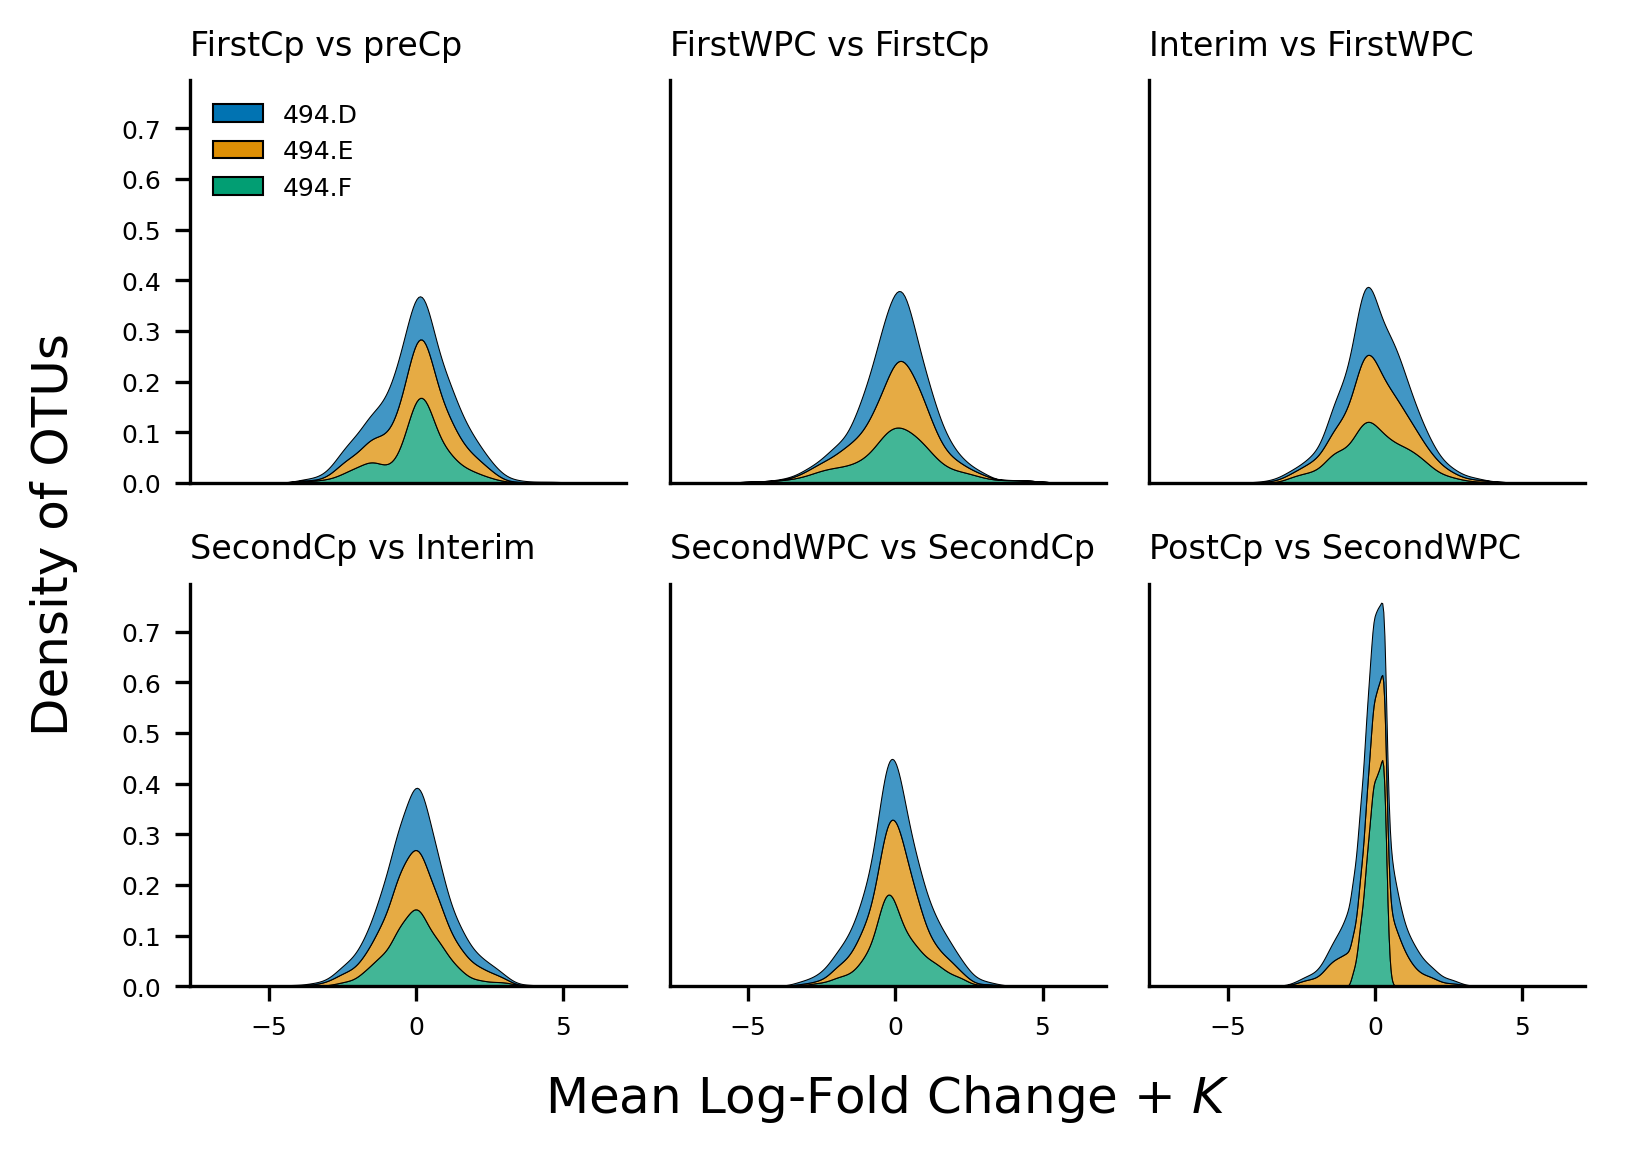

In [13]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.25)

subj_palette = dict(
    zip(
        ["494.D", "494.E", "494.F"],
        sns.color_palette("colorblind", 3)
    )
)

for i, (this_levels_diff, ax) in enumerate(zip(levels_diffs, axs.flatten())):
    _df = (
        subj_df_renamed
        .filter(like=this_levels_diff)
        .filter(like="_mean")
        .melt()
    )
    _df["variable"] = _df["variable"].str.extract("(494\.[DEF])")

    sns.kdeplot(
        data=_df,
        x="value",
        hue="variable",
        ax=ax,
        palette=subj_palette,
        fill=True,
        legend=False,
        multiple="stack",
        linewidth=0.25
    )
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.tick_params("both", labelsize=6)
    ax.set_title(this_levels_diff.replace("_", " "), fontsize=8)
    if i % 3 != 0:
        ax.tick_params("y", width=0)
    if i < 3:
        ax.tick_params("x", width=0)
    
from matplotlib.patches import Patch

subj_patches = [
    Patch(facecolor=color, label=label, linewidth=0.5, edgecolor="black")
    for label, color in subj_palette.items()
]

axs[0, 0].legend(
    handles=subj_patches,
    loc="upper left",
    fontsize=6,
    frameon=False
)

big_ax = fig.add_subplot(111, frameon=False)
big_ax.tick_params("both", labelcolor="none", bottom=False, left=False)
big_ax.set_ylabel("Density of OTUs")
big_ax.set_xlabel(r"Mean Log-Fold Change + $K$")

plt.show()

In [14]:
from itertools import combinations, product
import scipy.stats as ss

subjs = ["494.D", "494.E", "494.F"]
subj_combos = list(combinations(subjs, 2))

corr_dict = dict()
p_dict = dict()

for this_levels_diff in levels_diffs:
    tmp_dict_1 = dict()
    tmp_dict_2 = dict()
    for s1, s2 in subj_combos:
        _x = subj_df_renamed[f"{s2}_{this_levels_diff}_mean"].values
        _y = subj_df_renamed[f"{s1}_{this_levels_diff}_mean"].values
        rho, pval = ss.kendalltau(_x, _y)
        tmp_dict_1[" vs ".join([s1, s2])] = rho
        tmp_dict_2[" vs ".join([s1, s2])] = pval
    corr_dict[this_levels_diff] = tmp_dict_1
    p_dict[this_levels_diff] = tmp_dict_2

corr_df = pd.DataFrame.from_dict(corr_dict, orient="index")
p_df = pd.DataFrame.from_dict(p_dict, orient="index")
corr_df

494.D vs 494.E  494.D vs 494.F  494.E vs 494.F
FirstCp_vs_preCp            -0.453708       -0.366347       -0.164345
FirstWPC_vs_FirstCp         -0.072379       -0.408750       -0.495802
Interim_vs_FirstWPC         -0.209984       -0.367651       -0.404275
SecondCp_vs_Interim         -0.454899       -0.255054       -0.275562
SecondWPC_vs_SecondCp       -0.406551       -0.431445       -0.146190
PostCp_vs_SecondWPC         -0.727180       -0.095762       -0.104653

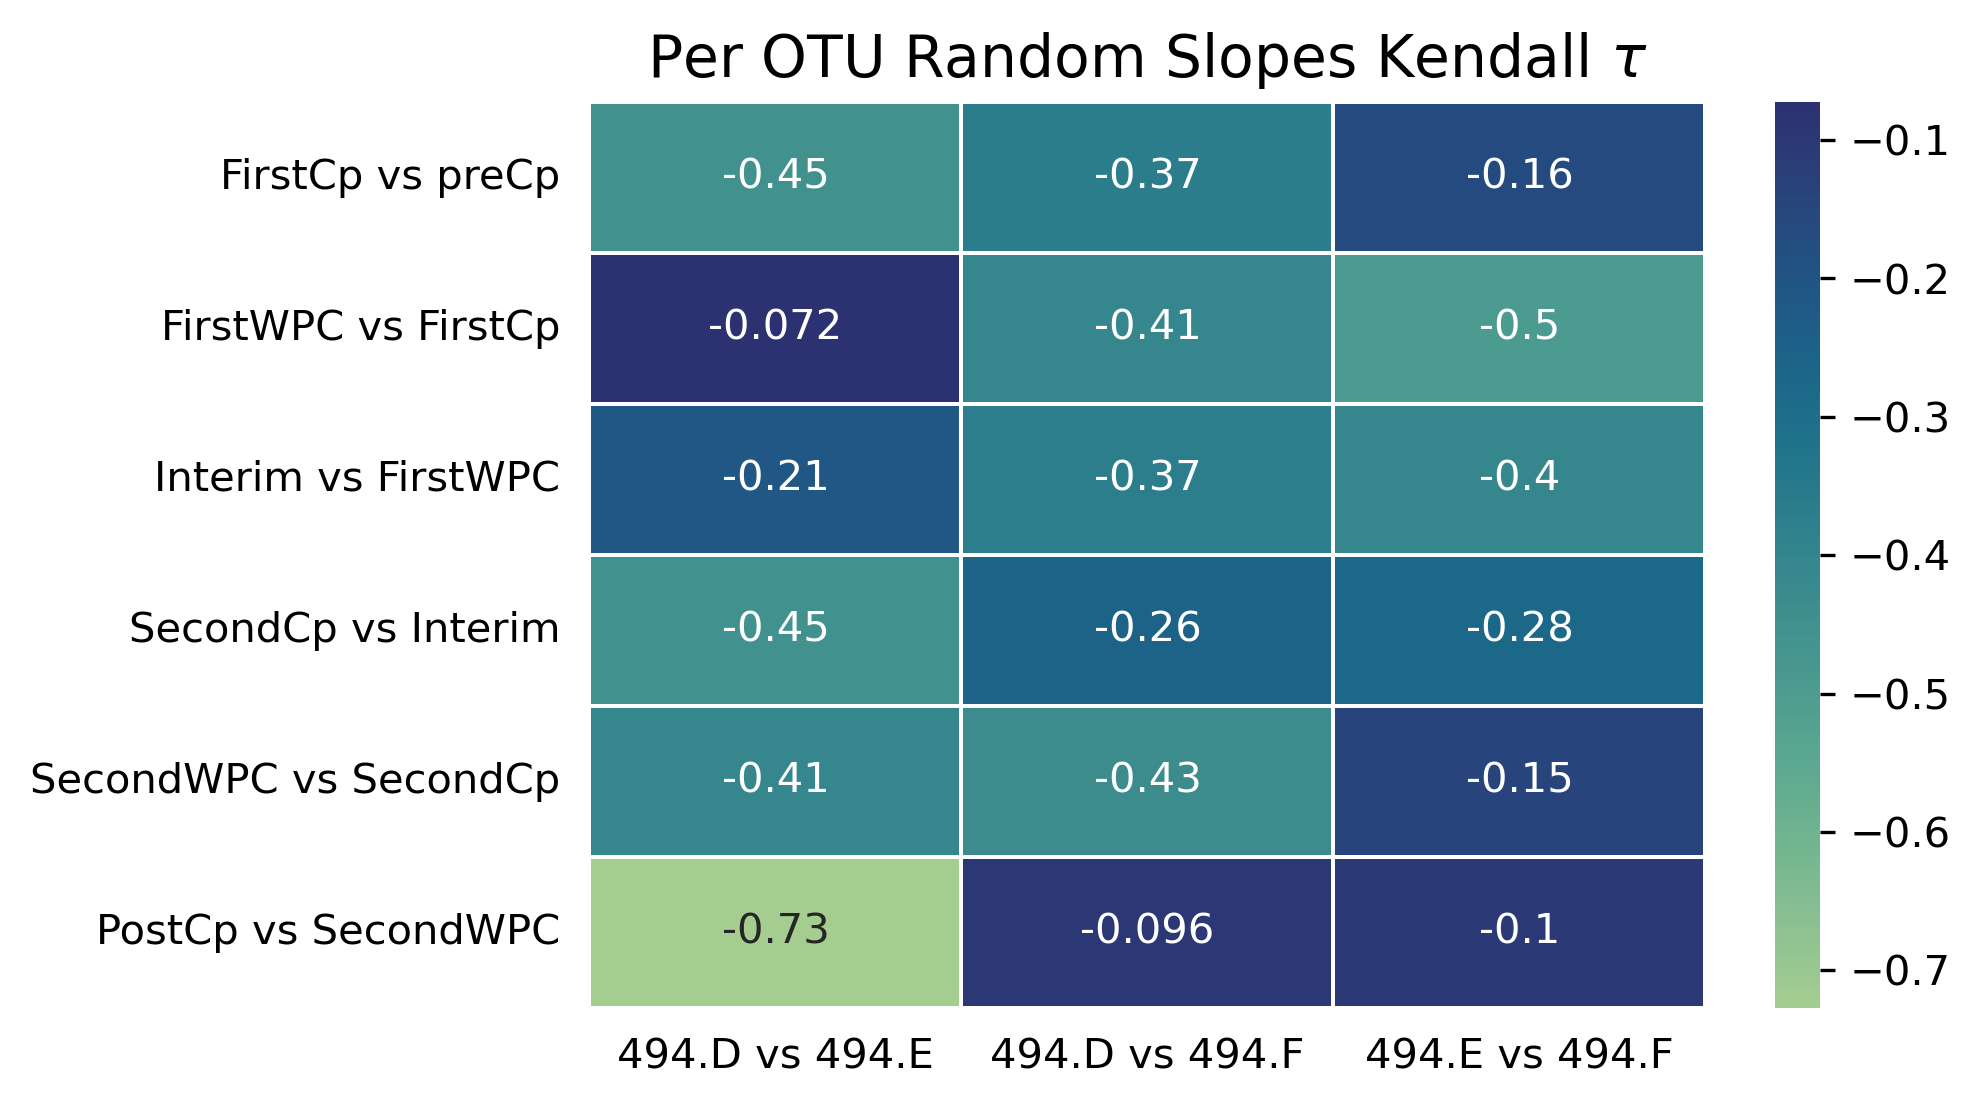

In [15]:
g = sns.heatmap(
    corr_df,
    annot=True,
    linewidths=.5,
    linecolor="white",
    cmap="crest",
    yticklabels=[x.replace("_", " ") for x in corr_df.index]
)
g.tick_params("both", width=0)

plt.title(
    "Per OTU Random Slopes Kendall " + r"$\tau$",
    fontsize=14,
    loc="center"
)

plt.show()

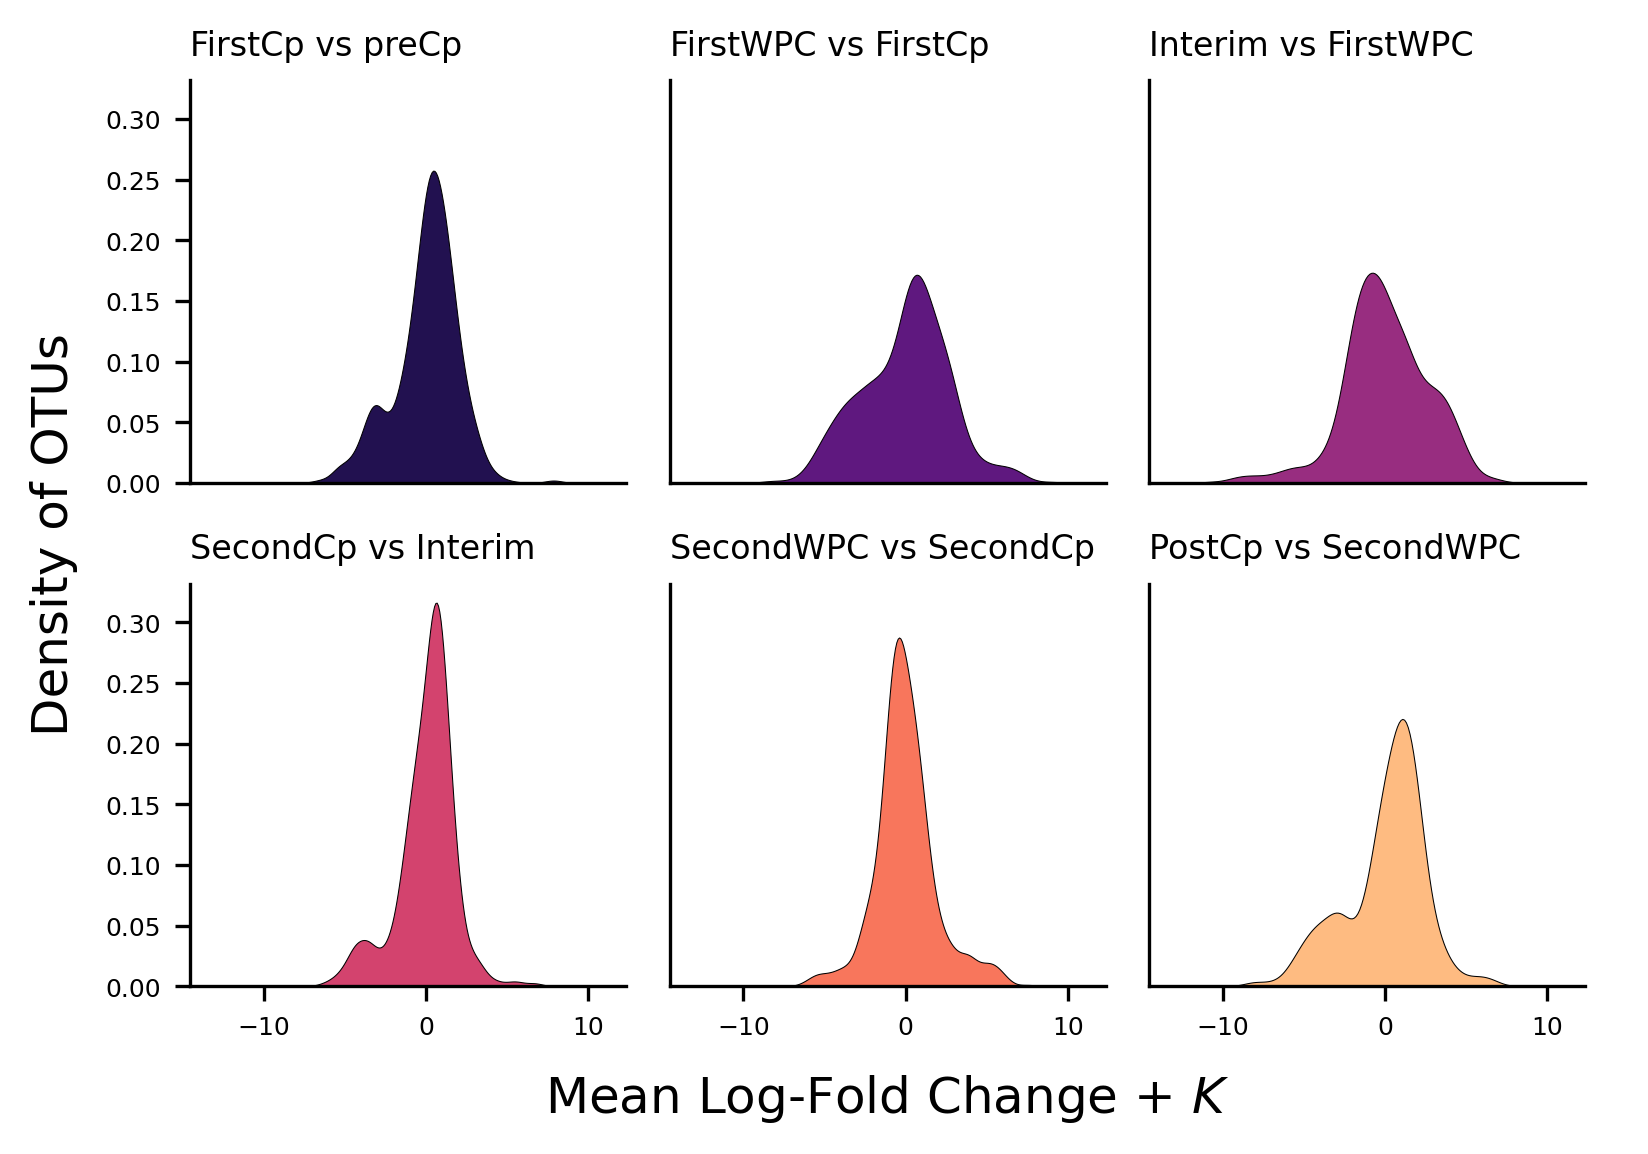

In [16]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.25)

palette = dict(zip(mean_level_diffs, sns.color_palette("magma", 6)))

for i, (ax, col) in enumerate(zip(axs.flatten(), mean_level_diffs)):
    #ax.hist(summ_diff_cent[col], bins=15, color=palette.get(col))
    sns.kdeplot(
        data=summ_diff_cent[col],
        color=palette.get(col),
        fill=True,
        alpha=1,
        linewidth=0.25,
        edgecolor="black",
        ax=ax
    )
    ax.set_ylabel("")
    ax.set_xlabel("")
    new_title = col.replace("_mean", "").replace("_", " ")
    ax.set_title(new_title, fontsize=8)
    ax.tick_params("both", labelsize=6)
    if i % 3 != 0:
        ax.tick_params("y", width=0)
    if i < 3:
        ax.tick_params("x", width=0)
        
    
big_ax = fig.add_subplot(111, frameon=False)
big_ax.tick_params("both", labelcolor="none", bottom=False, left=False)
big_ax.set_ylabel("Density of OTUs")
big_ax.set_xlabel(r"Mean Log-Fold Change + $K$")

plt.show()

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(summ_diff_cent[mean_level_diffs])

ranks_pca = PCA(n_components=6)
Y = ranks_pca.fit_transform(X)
feature_pcs_df = pd.DataFrame(Y, index=summ_diff_cent.index)
print(ranks_pca.explained_variance_ratio_)
feature_pcs_df.head()

[0.29972698 0.26904686 0.19575549 0.13904776 0.05887064 0.03755227]


0         1         2         3         4         5
Feature                                                             
F174654   1.658805 -0.341811  1.558981  0.599737  0.717946  1.179014
F833381   2.548526  0.677813 -0.826959 -1.897872  0.259329  0.449191
F4398588  1.245818 -0.190958  1.353320  1.274444 -1.309043 -0.338761
F4457453  2.873417 -0.968935  1.139200  3.448289 -1.179223  0.859376
F215097  -1.141406  0.986365 -0.867027  0.496947 -0.372340  0.777707

In [18]:
diff_pcs_df = pd.DataFrame(ranks_pca.components_.T, index=mean_level_diffs)
diff_pcs_df

0         1         2         3         4  \
FirstCp_vs_preCp_mean       0.069269 -0.348982 -0.773999 -0.190101 -0.239203   
FirstWPC_vs_FirstCp_mean   -0.279659  0.653669  0.032278  0.234123 -0.431427   
Interim_vs_FirstWPC_mean    0.348217 -0.359803  0.606301 -0.254522 -0.350893   
SecondCp_vs_Interim_mean   -0.513447 -0.404241  0.150217  0.373230  0.457434   
SecondWPC_vs_SecondCp_mean  0.594320  0.347408 -0.072612  0.006379  0.602248   
PostCp_vs_SecondWPC_mean   -0.422958  0.193306  0.066674 -0.839598  0.248149   

                                   5  
FirstCp_vs_preCp_mean      -0.425421  
FirstWPC_vs_FirstCp_mean   -0.502516  
Interim_vs_FirstWPC_mean   -0.440203  
SecondCp_vs_Interim_mean   -0.449277  
SecondWPC_vs_SecondCp_mean -0.397587  
PostCp_vs_SecondWPC_mean   -0.113097

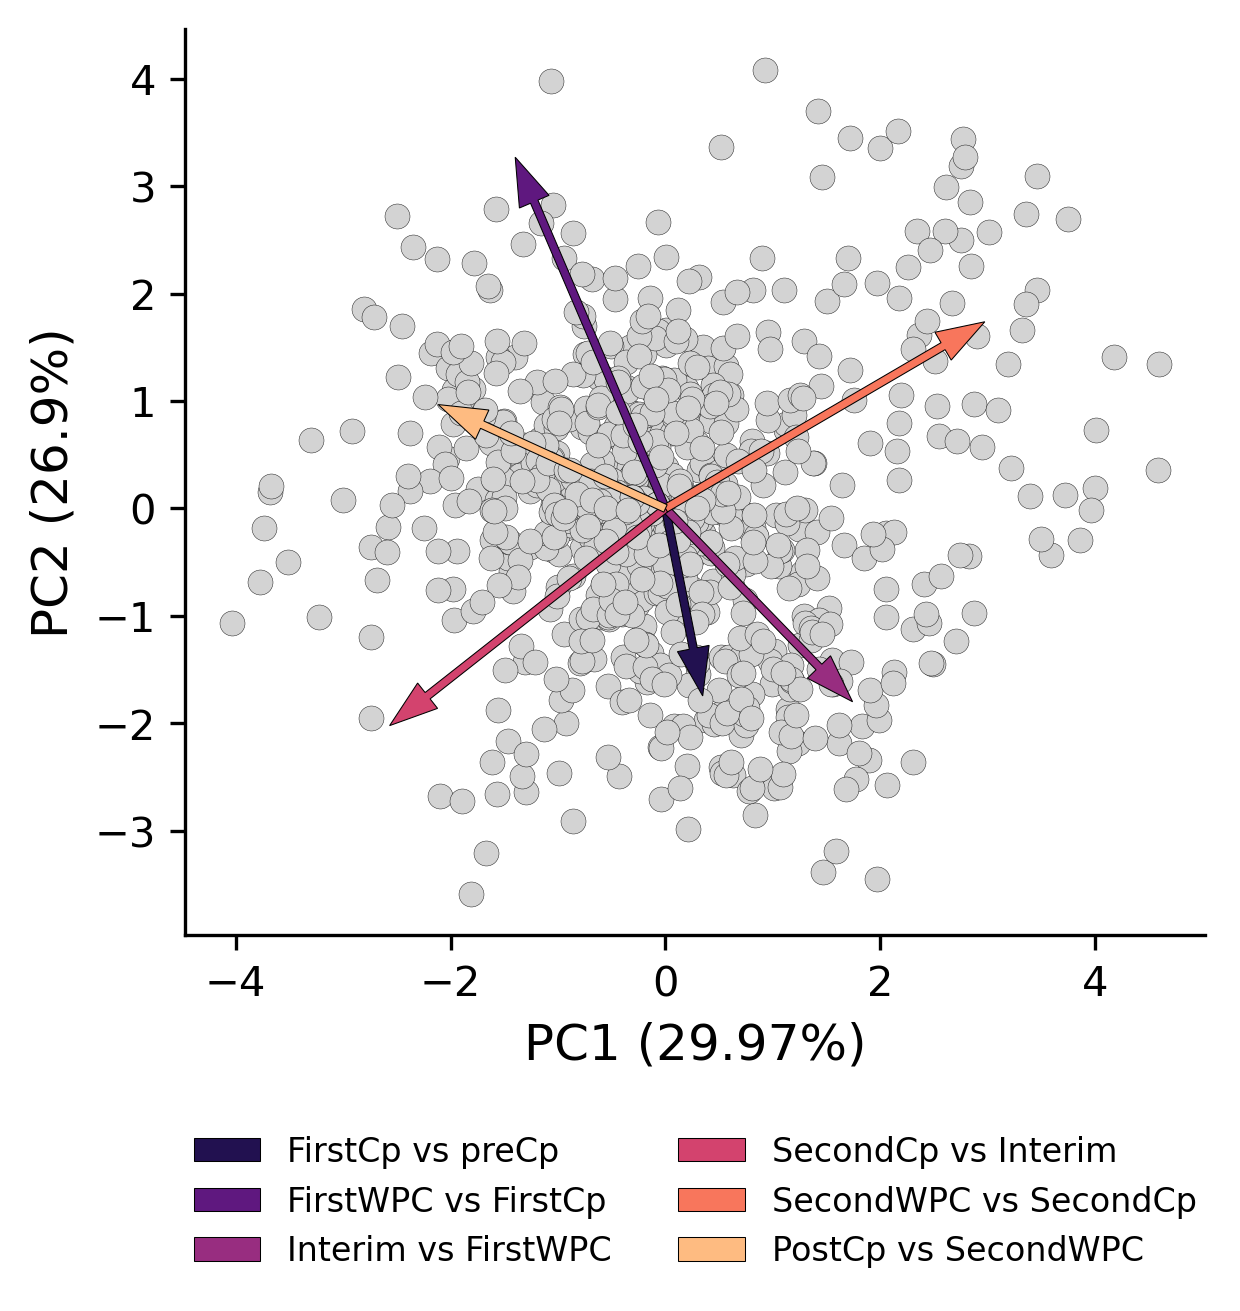

In [19]:
fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")

sns.scatterplot(
    data=feature_pcs_df,
    x=0,
    y=1,
    ax=ax,
    color="lightgray",
    edgecolor="black",
    linewidth=0.1
)

scale = 5
for diff, row in diff_pcs_df.iterrows():
    arrow_coords = (row[0]*scale, row[1]*scale)
    ax.arrow(
        x=0, y=0,
        dx=arrow_coords[0], dy=arrow_coords[1],
        head_width=0.3,
        length_includes_head=True,
        width=0.075,
        linewidth=0.25,
        edgecolor="black",
        facecolor=palette.get(diff),
        label=diff.replace("_mean", "").replace("_", " ")
    )

ax.legend(
    loc="lower center",
    fontsize=8,
    frameon=False,
    ncol=2,
    bbox_to_anchor=[0.5, -0.4]
)

var_explained = ranks_pca.explained_variance_ratio_ * 100
ax.set_xlabel(f"PC1 ({round(var_explained[0], 2)}%)")
ax.set_ylabel(f"PC2 ({round(var_explained[1], 2)}%)")

plt.savefig("../figures/relman_abx/contrast_pca.pdf")
plt.show()

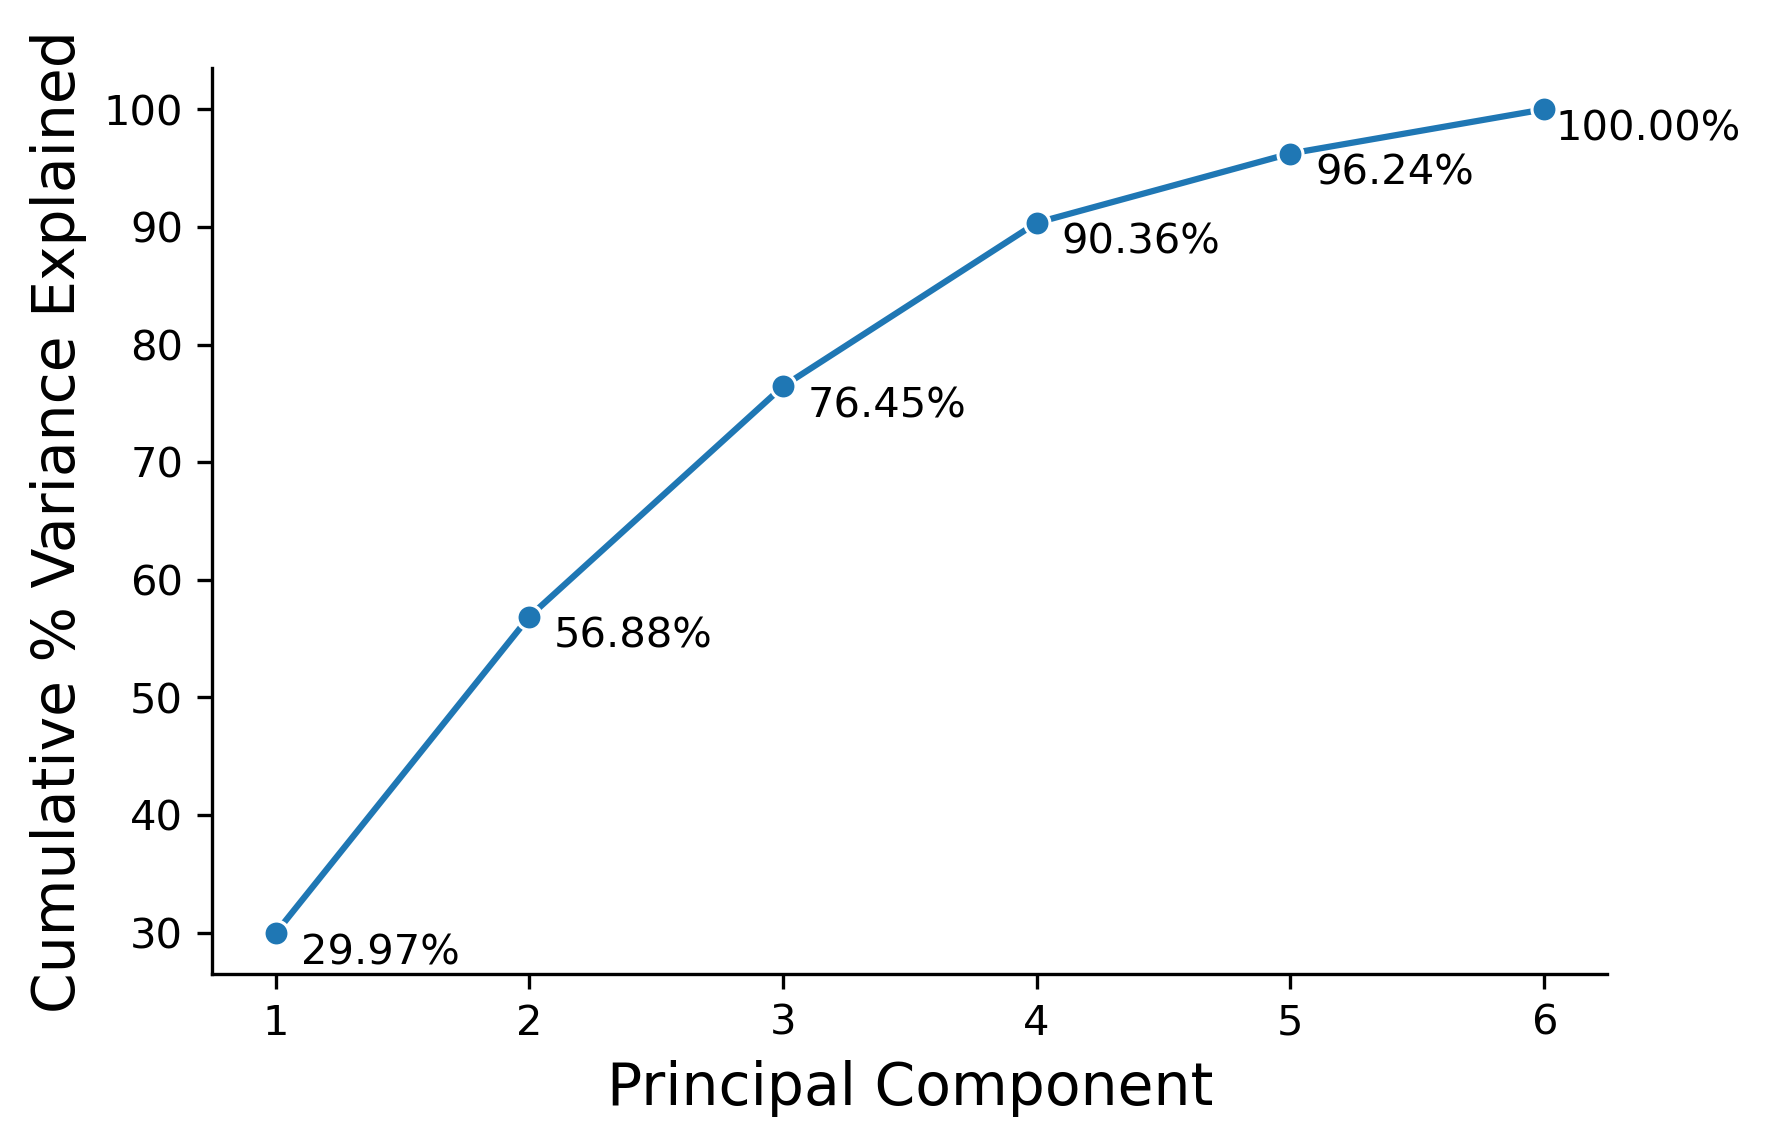

In [20]:
fig, ax = plt.subplots(1, 1)

x = np.arange(start=1, stop=7)
sns.lineplot(x=x, y=np.cumsum(var_explained), marker="o", ax=ax)
ax.set_xlabel("Principal Component", fontsize=14)
ax.set_ylabel("Cumulative % Variance Explained", fontsize=14)
#ax.set_yticklabels([f"{x}%" for x in ax.get_yticklabels()])

for x, y in zip(x, np.cumsum(var_explained)):
    ax.annotate(
        f"{y:.2f}%",
        (x, y),
        textcoords="offset points",
        xytext=(25, 0),
        ha="center",
        va="top"
    )

plt.show()

In [21]:
import biom

table = biom.load_table("../data/relman_abx/processed/processed_tbl.biom").to_dataframe(dense=True).T
table.shape

(141, 822)

In [22]:
md = pd.read_table("../data/relman_abx/processed/processed_md.tsv", sep="\t", index_col=0)
md["antibiotic"] = pd.Categorical(md["antibiotic"], categories=levels, ordered=True)
md.head()

age age_unit  altitude anonymized_name antibiotic  body_habitat  \
sample_name                                                                    
S494.E28      34    years         0             E28    Interim  UBERON:feces   
S494.D32      54    years         0             D32    Interim  UBERON:feces   
S494.D34      54    years         0             D34    Interim  UBERON:feces   
S494.D36      54    years         0             D36    Interim  UBERON:feces   
S494.D36.5n   54    years         0          D36.5n    Interim  UBERON:feces   

             body_product     body_site collection_timestamp  \
sample_name                                                    
S494.E28     UBERON:feces  UBERON:feces        11/11/05 0:00   
S494.D32     UBERON:feces  UBERON:feces        11/18/05 0:00   
S494.D34     UBERON:feces  UBERON:feces        11/26/05 0:00   
S494.D36     UBERON:feces  UBERON:feces        11/28/05 0:00   
S494.D36.5n  UBERON:feces  UBERON:feces        11/28/05 0:00   

                                  country  ...  latitude longitude  \
sample_name                                ...                       
S494.E28     GAZ:United States of America  ...     37.42   -122.17   
S494.D32     GAZ:United States of America  ...     37.42   -122.17   
S494.D34     GAZ:United States of America  ...     37.42   -122.17   
S494.D36     GAZ:United States of America  ...     37.42   -122.17   
S494.D36.5n  GAZ:United States of America  ...     37.42   -122.17   

             physical_specimen_location  physical_specimen_remaining public  \
sample_name                                                                   
S494.E28            Stanford University                        False   True   
S494.D32            Stanford University                        False   True   
S494.D34            Stanford University                        False   True   
S494.D36            Stanford University                        False   True   
S494.D36.5n         Stanford University                        False   True   

            qiita_study_id sample_type scientific_name     sex  \
sample_name                                                      
S494.E28               494       stool    Homo sapiens  female   
S494.D32               494       stool    Homo sapiens  female   
S494.D34               494       stool    Homo sapiens  female   
S494.D36               494       stool    Homo sapiens  female   
S494.D36.5n            494       stool    Homo sapiens  female   

                                                         title  
sample_name                                                     
S494.E28     Incomplete recovery and individualized respons...  
S494.D32     Incomplete recovery and individualized respons...  
S494.D34     Incomplete recovery and individualized respons...  
S494.D36     Incomplete recovery and individualized respons...  
S494.D36.5n  Incomplete recovery and individualized respons...  

[5 rows x 29 columns]

In [23]:
def log_ratio(table, top_feats, bot_feats):
    num_sum = table.loc[:, top_feats].sum(axis=1)
    denom_sum = table.loc[:, bot_feats].sum(axis=1)
    lr_df = pd.concat([num_sum, denom_sum], axis=1)
    lr_df.columns = ["num", "denom"]
    lr_df = lr_df.dropna(how="all")
    lr_df = lr_df + 1
    lr_df["log_ratio"] = np.log(lr_df["num"]/lr_df["denom"]).to_frame()
    lr_df = lr_df.join(md)
    return lr_df

In [24]:
deseq2_dfs = []
deseq2_qvals = []
for diff in levels_diffs:    
    deseq2_res = pd.read_table(f"../results/relman_abx/deseq2/{diff}.tsv")
    deseq2_dfs.append(deseq2_res["log2FoldChange"].to_frame(name=diff))
    deseq2_qvals.append(deseq2_res["padj"].to_frame(name=diff + "_padj"))
    
deseq2_df = pd.concat(deseq2_dfs, axis=1)
deseq2_df.index.name = "Feature"

deseq2_df.head()

FirstCp_vs_preCp  FirstWPC_vs_FirstCp  Interim_vs_FirstWPC  \
Feature                                                                
F358030          -1.240102             0.000000             0.172421   
F4306262         -0.028966            -0.647911            -0.480447   
F3903651         -0.124914            -3.097728             2.570711   
F4465746         -0.670813             0.916923            -0.842784   
F3943186          0.401887             0.120338            -0.313170   

          SecondCp_vs_Interim  SecondWPC_vs_SecondCp  PostCp_vs_SecondWPC  
Feature                                                                    
F358030             -1.473516               2.723742            -1.389274  
F4306262             1.936007              -0.115533             1.289363  
F3903651             0.869724              -0.343713             0.615625  
F4465746             1.547856              -1.281132            -1.654746  
F3943186            -0.011741               0.240457            -0.266757

In [25]:
deseq2_qval_df = pd.concat(deseq2_qvals, axis=1).replace({np.nan: 1})
deseq2_qval_df.head()

FirstCp_vs_preCp_padj  FirstWPC_vs_FirstCp_padj  \
F358030                0.952890                  1.000000   
F4306262               0.984917                  0.862194   
F3903651               0.974613                  0.008783   
F4465746               0.952890                  0.788054   
F3943186               1.000000                  1.000000   

          Interim_vs_FirstWPC_padj  SecondCp_vs_Interim_padj  \
F358030                   0.984640                  1.000000   
F4306262                  0.879760                  0.118717   
F3903651                  0.009614                  0.412782   
F4465746                  0.806042                  0.312357   
F3943186                  1.000000                  1.000000   

          SecondWPC_vs_SecondCp_padj  PostCp_vs_SecondWPC_padj  
F358030                     1.000000                  0.883609  
F4306262                    1.000000                  0.539609  
F3903651                    0.987855                  0.769606  
F4465746                    0.592684                  0.482692  
F3943186                    1.000000                  1.000000

In [26]:
(deseq2_qval_df < 0.05).sum()

FirstCp_vs_preCp_padj          8
FirstWPC_vs_FirstCp_padj      14
Interim_vs_FirstWPC_padj      34
SecondCp_vs_Interim_padj       6
SecondWPC_vs_SecondCp_padj    13
PostCp_vs_SecondWPC_padj      17
dtype: int64

In [27]:
aldex2_res_full = pd.read_table("../results/relman_abx/aldex2_results.tsv", sep="\t", index_col=0)
aldex2_res = aldex2_res_full.filter(like="Estimate").filter(like="antibiotic")

aldex2_res.head()

model.antibioticFirstCp Estimate  model.antibioticFirstWPC Estimate  \
F358030                          -0.589441                           0.108938   
F4306262                         -0.348871                          -1.226516   
F3903651                         -0.661934                          -4.090539   
F4465746                         -1.673095                           0.517485   
F3943186                          0.155886                           0.538640   

          model.antibioticInterim Estimate  model.antibioticPostCp Estimate  \
F358030                           0.432698                         0.315557   
F4306262                         -0.992328                         0.053139   
F3903651                         -0.559966                         1.398219   
F4465746                         -1.094283                        -1.343585   
F3943186                          0.242880                         0.205902   

          model.antibioticSecondCp Estimate  \
F358030                           -0.980308   
F4306262                           2.123225   
F3903651                           0.942773   
F4465746                          -0.759719   
F3943186                          -0.007615   

          model.antibioticSecondWPC Estimate  
F358030                             1.167657  
F4306262                            0.702417  
F3903651                            0.302861  
F4465746                           -0.881431  
F3943186                            0.239256

In [28]:
aldex2_qval = aldex2_res_full.filter(like="BH").filter(like="antibiotic")
aldex2_qval.head()

model.antibioticFirstCp Pr(>|t|).BH  \
F358030                              0.993855   
F4306262                             1.000000   
F3903651                             1.000000   
F4465746                             1.000000   
F3943186                             1.000000   

          model.antibioticFirstWPC Pr(>|t|).BH  \
F358030                               1.000000   
F4306262                              1.000000   
F3903651                              0.432057   
F4465746                              1.000000   
F3943186                              1.000000   

          model.antibioticInterim Pr(>|t|).BH  \
F358030                                   1.0   
F4306262                                  1.0   
F3903651                                  1.0   
F4465746                                  1.0   
F3943186                                  1.0   

          model.antibioticPostCp Pr(>|t|).BH  \
F358030                                  1.0   
F4306262                                 1.0   
F3903651                                 1.0   
F4465746                                 1.0   
F3943186                                 1.0   

          model.antibioticSecondCp Pr(>|t|).BH  \
F358030                               0.999528   
F4306262                              1.000000   
F3903651                              1.000000   
F4465746                              1.000000   
F3943186                              1.000000   

          model.antibioticSecondWPC Pr(>|t|).BH  
F358030                                0.984711  
F4306262                               1.000000  
F3903651                               1.000000  
F4465746                               1.000000  
F3943186                               1.000000

In [29]:
(aldex2_qval < 0.05).sum()

model.antibioticFirstCp Pr(>|t|).BH      0
model.antibioticFirstWPC Pr(>|t|).BH     0
model.antibioticInterim Pr(>|t|).BH      0
model.antibioticPostCp Pr(>|t|).BH       0
model.antibioticSecondCp Pr(>|t|).BH     0
model.antibioticSecondWPC Pr(>|t|).BH    0
dtype: int64

In [30]:
ancombc_res_full = pd.read_table("../results/relman_abx/ancombc_results_beta.tsv", sep="\t", index_col=0)
ancombc_res = ancombc_res_full.filter(like="antibiotic")

ancombc_res.head()

antibioticFirstCp  antibioticFirstWPC  antibioticInterim  \
F358030           -0.224736            0.066105           0.053513   
F4306262          -0.073151           -0.797358          -0.689639   
F3903651          -0.430007           -1.897165          -0.389209   
F4465746          -0.641553            0.310423          -0.482090   
F3943186           0.054870            0.149982           0.025526   

          antibioticPostCp  antibioticSecondCp  antibioticSecondWPC  
F358030           0.027176           -0.252123             0.523310  
F4306262          0.048388            1.378285             0.550487  
F3903651          0.595767            0.531529             0.157638  
F4465746         -0.665142           -0.072495            -0.293538  
F3943186          0.023236            0.061602             0.083453

In [31]:
ancombc_qval = pd.read_table("../results/relman_abx/ancombc_results_qval.tsv", sep="\t", index_col=0)
ancombc_qval = ancombc_qval.filter(like="antibiotic")
ancombc_qval.head()

antibioticFirstCp  antibioticFirstWPC  antibioticInterim  \
F358030                 1.0            1.000000                1.0   
F4306262                1.0            1.000000                1.0   
F3903651                1.0            0.030655                1.0   
F4465746                1.0            1.000000                1.0   
F3943186                1.0            1.000000                1.0   

          antibioticPostCp  antibioticSecondCp  antibioticSecondWPC  
F358030                1.0                 1.0                  1.0  
F4306262               1.0                 1.0                  1.0  
F3903651               1.0                 1.0                  1.0  
F4465746               1.0                 1.0                  1.0  
F3943186               1.0                 1.0                  1.0

In [32]:
(ancombc_qval < 0.05).sum()

antibioticFirstCp       1
antibioticFirstWPC     16
antibioticInterim       4
antibioticPostCp        9
antibioticSecondCp      5
antibioticSecondWPC     5
dtype: int64

In [33]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
level_regex = re.compile("(\w+)_vs_(\w+)")

_to_join = md[["antibiotic", "host_subject_id"]]
_to_join = _to_join.assign(abx_class=LabelEncoder().fit_transform(_to_join["antibiotic"]))
_subj_ohe = pd.DataFrame(
    OneHotEncoder().fit_transform(_to_join["host_subject_id"].values.reshape(-1, 1))
    .todense(),
    index=_to_join.index,
)
_to_join = pd.concat([_to_join, pd.DataFrame(_subj_ohe)], axis=1)
_to_join = _to_join.drop(columns=["antibiotic", "host_subject_id"])

def create_tool_predictor_dfs(n):
    feat_dict = defaultdict(dict)
    lr_df_dict = dict()

    for diff in levels_diffs:    
        deseq2_res = deseq2_df[diff].sort_values(ascending=False)
        top_feats_deseq2 = deseq2_res.head(n).index
        bot_feats_deseq2 = deseq2_res.tail(n).index
        deseq2_lr_df = log_ratio(table, top_feats_deseq2, bot_feats_deseq2)

        feat_dict[diff]["deseq2"] = {"top": set(top_feats_deseq2), "bot": set(bot_feats_deseq2)}

        _birdman_df = summ_diff_cent[f"{diff}_mean"].sort_values(ascending=False)
        top_feats_birdman = _birdman_df.head(n).index
        bot_feats_birdman = _birdman_df.tail(n).index
        birdman_lr_df = log_ratio(table, top_feats_birdman, bot_feats_birdman)

        feat_dict[diff]["birdman"] = {"top": set(top_feats_birdman), "bot": set(bot_feats_birdman)}
        lr_df_dict[diff] = {"deseq2": deseq2_lr_df, "birdman": birdman_lr_df}
    
    lr_df_dict_2 = dict()

    col_regex = re.compile("model\.antibiotic(\w*) Estimate")
    for col in aldex2_res.columns:
        level = col_regex.search(col).groups()[0]
        _df = aldex2_res[col].sort_values(ascending=False)
        top_feats = _df.head(n).index
        bot_feats = _df.tail(n).index
        feat_dict[level]["aldex2"] = {"top": set(top_feats), "bot": set(bot_feats)}
        _lr_df = log_ratio(table, top_feats, bot_feats)
        lr_df_dict_2[level] = {"aldex2": _lr_df}

    col_regex = re.compile("antibiotic(\w*)")
    for col in ancombc_res.columns:
        level = col_regex.search(col).groups()[0]
        _df = ancombc_res[col].sort_values(ascending=False)
        top_feats = _df.head(n).index
        bot_feats = _df.tail(n).index
        feat_dict[level]["ancombc"] = {"top": set(top_feats), "bot": set(bot_feats)}
        _lr_df = log_ratio(table, top_feats, bot_feats)
        lr_df_dict_2[level]["ancombc"] = _lr_df
        
    deseq2_predictor_dict = dict()
    birdman_predictor_dict = dict()
    aldex2_predictor_dict = dict()
    ancombc_predictor_dict = dict()
    random_predictor_dict = dict()

    for diff, tool_dict in lr_df_dict.items():
        level_1, level_2 = level_regex.search(diff).groups()
        deseq2_predictor_dict[diff] = tool_dict["deseq2"]["log_ratio"]
        birdman_predictor_dict[diff] = tool_dict["birdman"]["log_ratio"]
        
    for level, tool_dict in lr_df_dict_2.items():
        aldex2_predictor_dict[level] = tool_dict["aldex2"]["log_ratio"]
        ancombc_predictor_dict[level] = tool_dict["ancombc"]["log_ratio"]

    birdman_predictor_df = pd.DataFrame.from_dict(birdman_predictor_dict).join(_to_join)
    deseq2_predictor_df = pd.DataFrame.from_dict(deseq2_predictor_dict).join(_to_join)
    aldex2_predictor_df = pd.DataFrame.from_dict(aldex2_predictor_dict).join(_to_join)
    ancombc_predictor_df = pd.DataFrame.from_dict(ancombc_predictor_dict).join(_to_join)
    
    tool_dfs = {
        "birdman": birdman_predictor_df,
        "deseq2": deseq2_predictor_df,
        "aldex2": aldex2_predictor_df,
        "ancombc": ancombc_predictor_df,
    }
    
    return tool_dfs

In [34]:
tool_predictor_dfs = create_tool_predictor_dfs(40)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from skbio.stats.composition import clr

table_clr = pd.DataFrame(clr(table.values + 1), index=table.index, columns=table.columns)

In [36]:
from sklearn.metrics import balanced_accuracy_score, make_scorer, log_loss
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

scorer = make_scorer(balanced_accuracy_score, adjusted=False)
scoring = {"balanced_accuracy": scorer, "f1_weighted": "f1_weighted"}

model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    fit_intercept=True,
    C=1
)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

balanced_acc_dict = dict()
f1_dict = dict()

rf_model = RandomForestClassifier(random_state=63, n_estimators=100)
_df = table_clr.join(_to_join)
X = _df.drop(columns=["abx_class"]).values
y = _df["abx_class"].values
rf_scores = cross_validate(rf_model, X, y, scoring=scoring, cv=cv)
rf_acc = rf_scores["test_balanced_accuracy"]
rf_f1 = rf_scores["test_f1_weighted"]

print(f"Random Forest: Balanced Accuracy: {np.mean(rf_acc):.3f}, {np.std(rf_acc):.3f}")
print(f"Random Forest: Weighted F1: {np.mean(rf_f1):.3f}, {np.std(rf_f1):.3f}")
print()
balanced_acc_dict["rf"] = rf_acc
f1_dict["rf"] = rf_f1

for tool, df in tool_predictor_dfs.items():
    X = df.drop(columns=["abx_class"]).values
    y = df["abx_class"].values
    
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    
    acc = scores["test_balanced_accuracy"]
    f1 = scores["test_f1_weighted"]
    
    balanced_acc_dict[tool] = acc
    f1_dict[tool] = f1

    print(f"{tool} Balanced Accuracy: {np.mean(acc):.3f}, {np.std(acc):.3f}")
    print(f"{tool} Weighted F1: {np.mean(f1):.3f}, {np.std(f1):.3f}")
    print()
    
balanced_acc_df = pd.DataFrame.from_dict(balanced_acc_dict).melt()
f1_df = pd.DataFrame.from_dict(f1_dict).melt()

Random Forest: Balanced Accuracy: 0.407, 0.098
Random Forest: Weighted F1: 0.429, 0.082

birdman Balanced Accuracy: 0.783, 0.084
birdman Weighted F1: 0.751, 0.079

deseq2 Balanced Accuracy: 0.536, 0.088
deseq2 Weighted F1: 0.486, 0.084

aldex2 Balanced Accuracy: 0.459, 0.092
aldex2 Weighted F1: 0.435, 0.070

ancombc Balanced Accuracy: 0.429, 0.097
ancombc Weighted F1: 0.408, 0.085



In [37]:
f1_df.groupby("variable").agg(["mean", "std"])

value          
              mean       std
variable                    
aldex2    0.434962  0.070894
ancombc   0.408264  0.086310
birdman   0.751020  0.079591
deseq2    0.486246  0.084963
rf        0.429356  0.082773

In [38]:
balanced_acc_df.groupby("variable").agg(["mean", "std"])

value          
              mean       std
variable                    
aldex2    0.459486  0.092437
ancombc   0.429435  0.097739
birdman   0.783432  0.084817
deseq2    0.535592  0.089349
rf        0.406793  0.099420

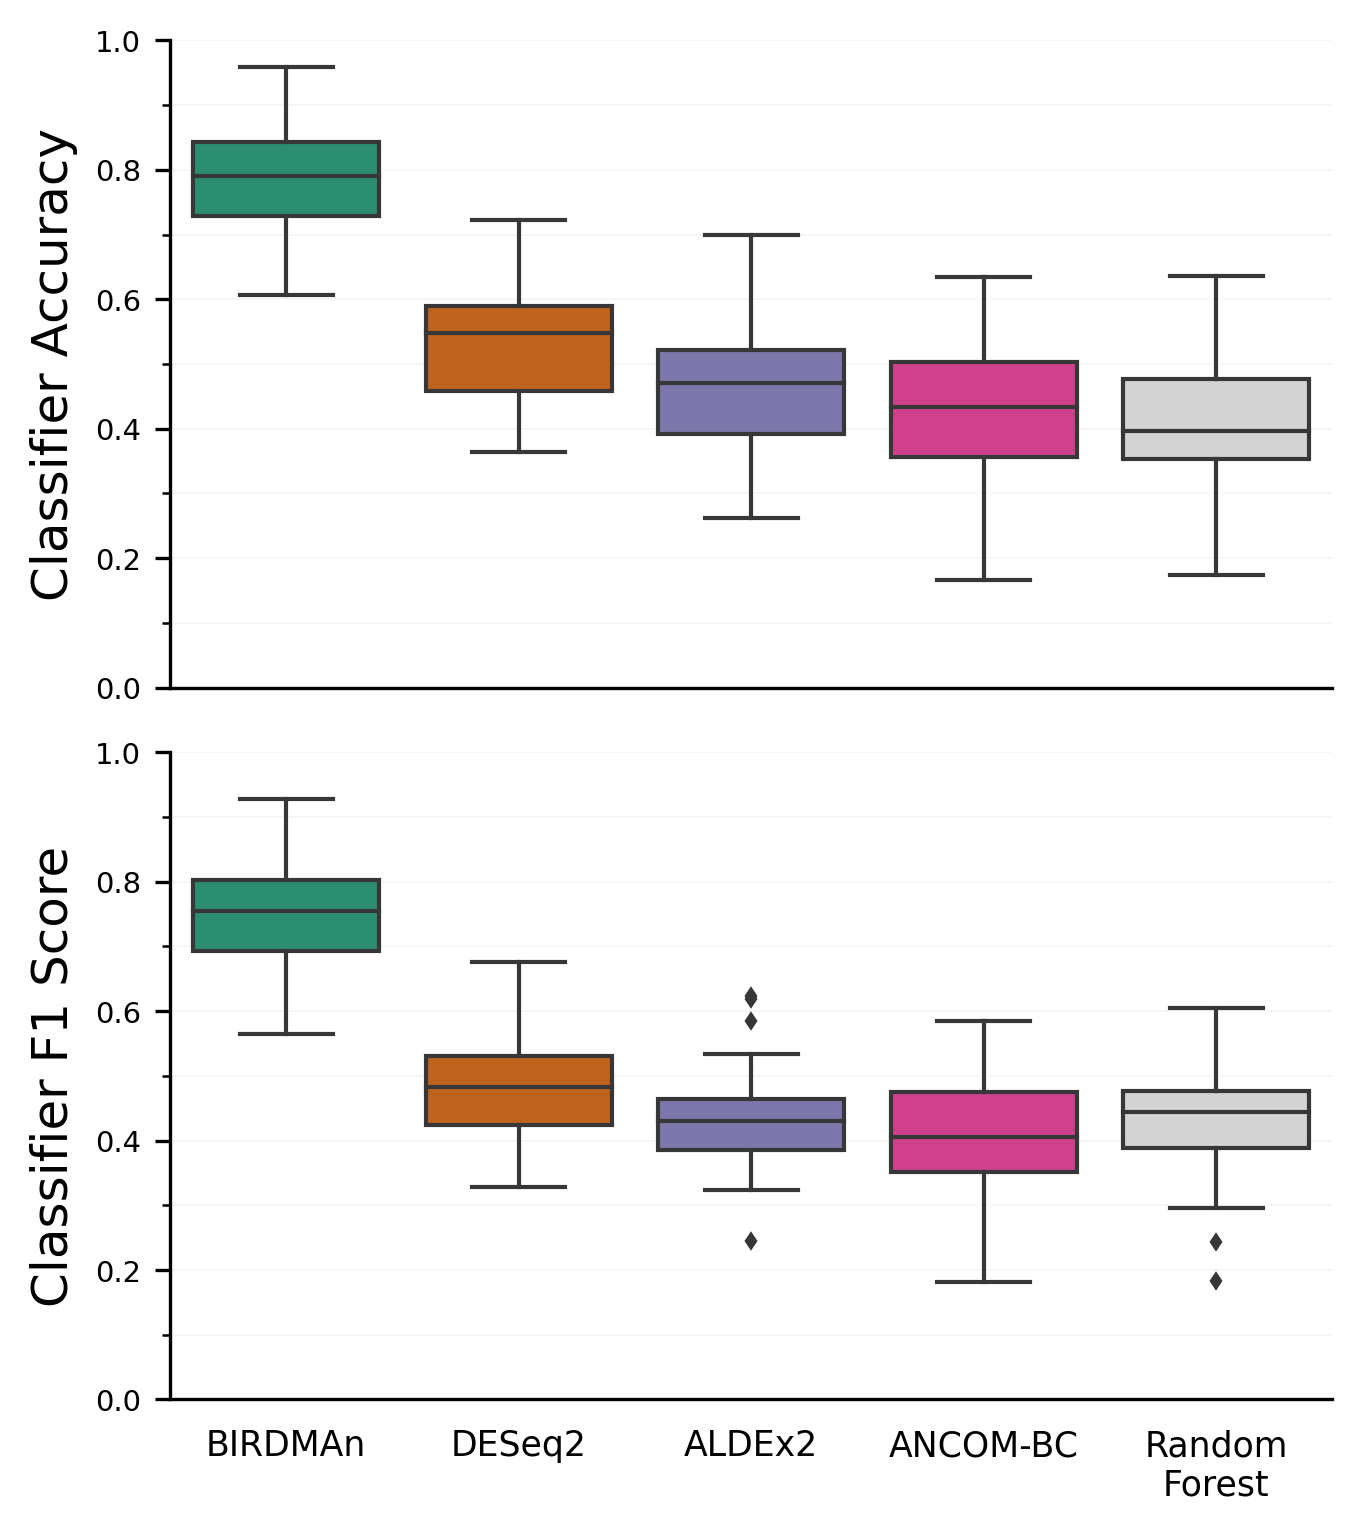

In [39]:
from matplotlib.ticker import AutoMinorLocator

fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1)

new_tool_text_styling_dict = tool_text_styling_dict.copy()
new_tool_text_styling_dict["rf"] = "Random\nForest"

new_tool_palette = tool_palette.copy()
new_tool_palette["Random\nForest"] = "lightgray"

order = ["BIRDMAn", "DESeq2", "ALDEx2", "ANCOM-BC", "Random\nForest"]

_df_acc = (
    balanced_acc_df
    .assign(Tool=balanced_acc_df.variable.map(new_tool_text_styling_dict))
    .drop(columns=["variable"])
)
_df_f1 = (
    f1_df
    .assign(Tool=f1_df.variable.map(new_tool_text_styling_dict))
    .drop(columns=["variable"])
)

for ax, _df in zip(axs, [_df_acc, _df_f1]):
    plot_args = {"data": _df, "x": "Tool", "y": "value", "palette": new_tool_palette,
                 "ax": ax}
    sns.boxplot(
        **plot_args,
        linewidth=1,
        order=order,
        flierprops={"markersize": 2}
    )

    ax.set_xlabel("")

    ax.set_axisbelow(True)
    ax.tick_params("x", width=0)
    ax.tick_params("y", labelsize="x-small")
    ax.tick_params("x", labelsize="small")

    _df_summ = (
        _df
        .groupby("Tool")
        .agg(["mean", "std"])
        .droplevel(0, axis=1)
        .loc[order]
    )
    ax.set_yticks(np.arange(0, 1.01, 0.2))
    ax.set_ylim([0, 1])
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.grid(axis="y", alpha=0.5, which="both")

axs[0].set_ylabel("Classifier Accuracy", fontsize=12)
axs[1].set_ylabel("Classifier F1 Score", fontsize=12)

plt.savefig("../figures/relman_abx/acc_f1.pdf")
plt.show()

In [40]:
thresh_balanced_acc_dict = defaultdict(dict)
thresh_f1_dict = defaultdict(dict)

for n in np.arange(10, 101, 10):
    this_tool_predictor_dfs = create_tool_predictor_dfs(n)
    
    for tool, df in this_tool_predictor_dfs.items():
        X = df.drop(columns=["abx_class"]).values
        y = df["abx_class"].values

        scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

        acc = scores["test_balanced_accuracy"]
        f1 = scores["test_f1_weighted"]

        thresh_balanced_acc_dict[n][tool] = acc
        thresh_f1_dict[n][tool] = f1

In [41]:
thresh_balanced_acc_df = (
    pd.DataFrame.from_records(thresh_balanced_acc_dict)
    .apply(lambda x: x.explode())
    .reset_index()
    .melt(id_vars="index")
    .assign(value=lambda x: x["value"].astype(float))
    .assign(Tool=lambda x: x["index"].map(tool_text_styling_dict))
    .rename(columns={"variable": "N", "value": "Accuracy"})
)
thresh_balanced_acc_df.head()

index   N  Accuracy     Tool
0  birdman  10  0.654762  BIRDMAn
1  birdman  10  0.773810  BIRDMAn
2  birdman  10  0.560544  BIRDMAn
3  birdman  10  0.452381  BIRDMAn
4  birdman  10  0.765306  BIRDMAn

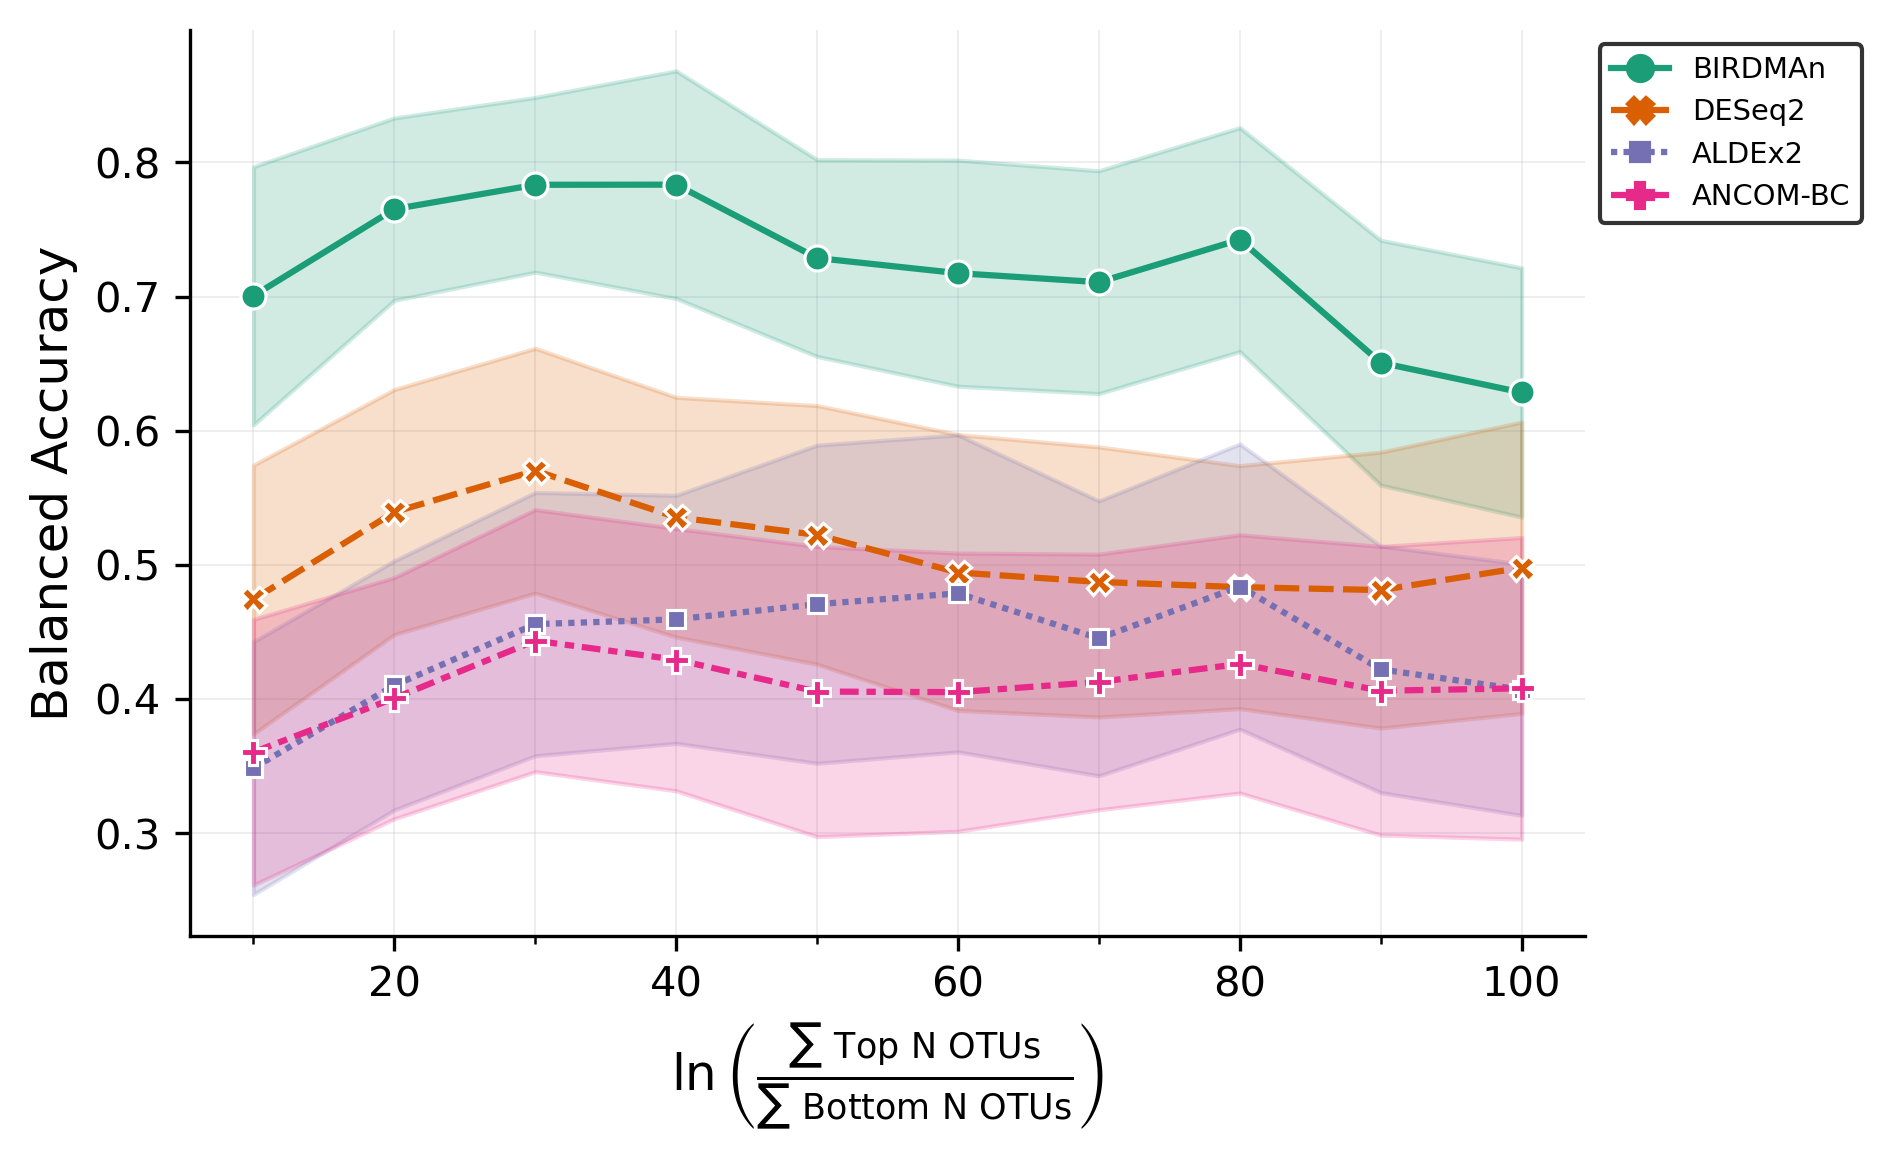

In [42]:
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1)

sns.lineplot(
    data=thresh_balanced_acc_df,
    x="N",
    y="Accuracy",
    hue="Tool",
    style="Tool",
    ci="sd",
    markers=True,
    palette=tool_palette,
    ax=ax
)
ax.set_xlabel(r"$\ln\left(\frac{\sum\ \mathrm{Top\ N\ OTUs}}{\sum\ \mathrm{Bottom\ N\ OTUs}}\right)$")
ax.set_ylabel("Balanced Accuracy")
ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))

ax.legend(loc="upper left", bbox_to_anchor=[1, 1], edgecolor="black")
ax.grid(which="both")

plt.savefig("../figures/relman_abx/thresh_acc.pdf")
plt.show()

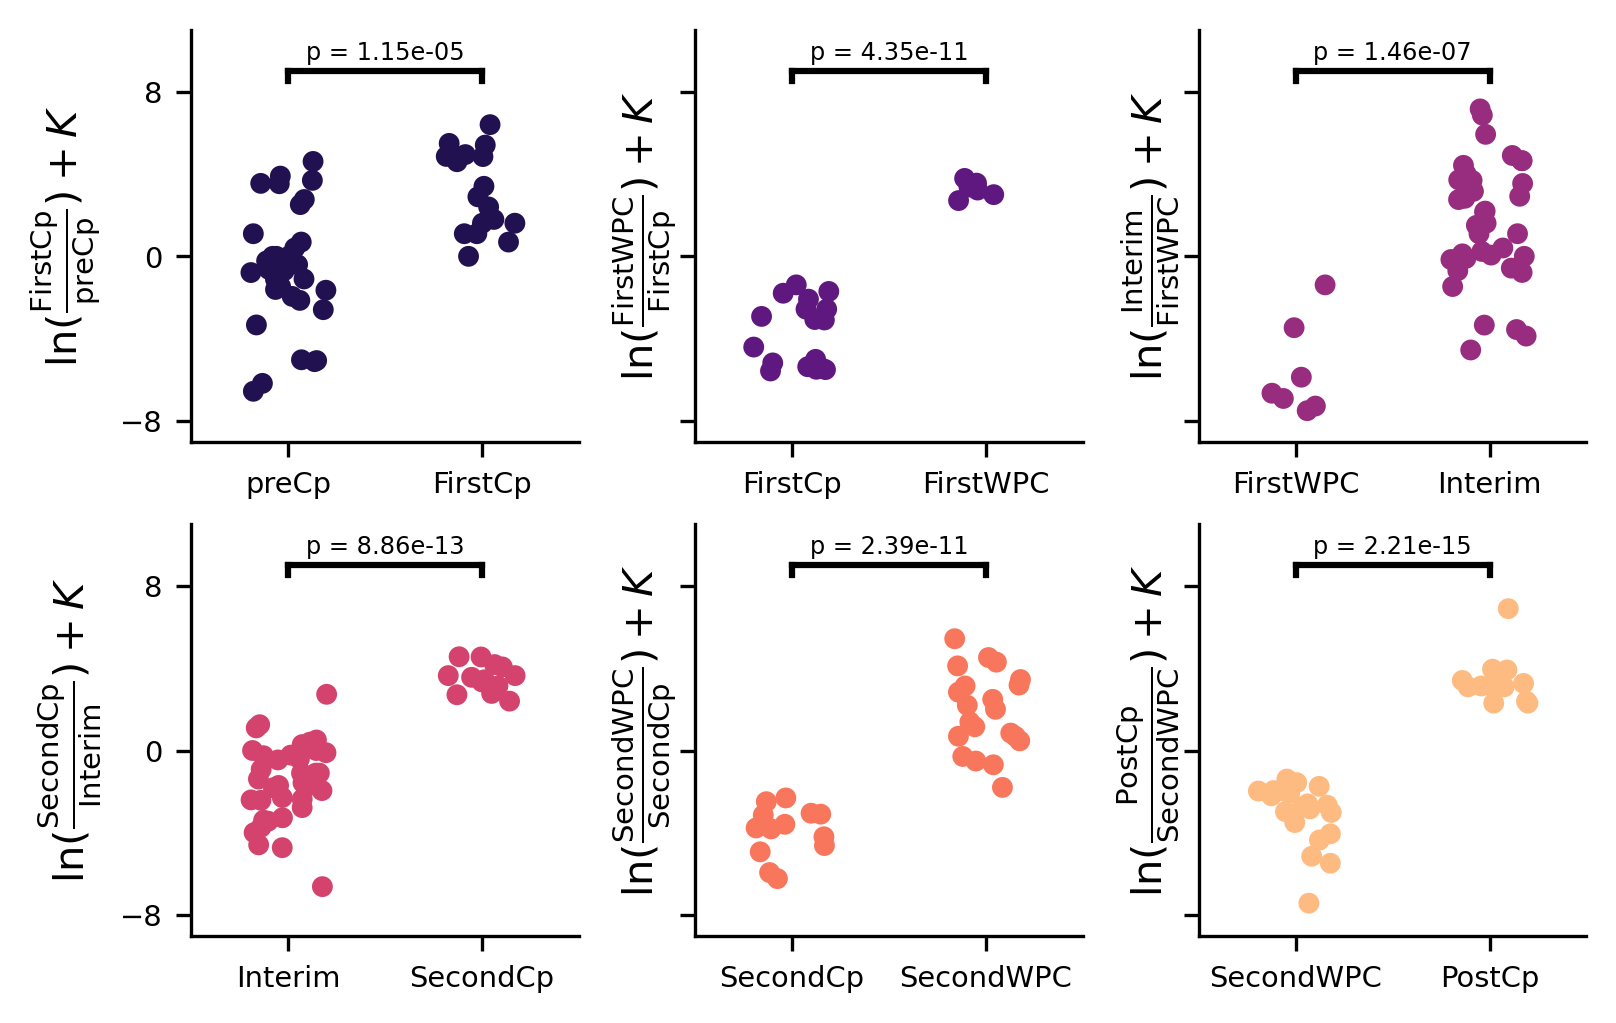

In [43]:
_df = tool_predictor_dfs["birdman"].filter(like="vs").join(md[["antibiotic"]])

fig, axs = plt.subplots(2, 3, sharey=True)
plt.subplots_adjust(wspace=0.3)

for ax, col in zip(axs.flatten(), _df.filter(like="vs").columns):
    grp1, grp2 = level_regex.search(col).groups()
    grp_df = _df[_df["antibiotic"].isin([grp1, grp2])].copy()
    grp_df["antibiotic"] = grp_df["antibiotic"].astype(str)
    
    sns.stripplot(
        data=grp_df,
        x="antibiotic",
        y=col,
        order=[grp2, grp1],
        color=palette[col + "_mean"],
        jitter=0.2,
        ax=ax
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params("both", labelsize="x-small")
    
    grp1_vals = grp_df[grp_df["antibiotic"] == grp1][col]
    grp2_vals = grp_df[grp_df["antibiotic"] == grp2][col]
    t, p = ss.ttest_ind(grp1_vals, grp2_vals, alternative="greater")
    
    ylab = fr"$\ln(\frac{{\mathrm{{{grp1}}}}}{{\mathrm{{{grp2}}}}}) + K$"
    ax.set_ylabel(ylab, fontsize="medium")
    ax.set_ylim([-9, 11])
    ax.yaxis.set_major_locator(mticker.MaxNLocator(3))
    ax.set_xlim([-0.5, 1.5])
    
    ax.plot([0, 1], [9, 9], color="k")
    ax.plot([0, 0], [8.5, 9], color="k")
    ax.plot([1, 1], [8.5, 9], color="k")
    ax.text(
        x=0.5,
        y=9.3,
        s=f"p = {p:.2e}",
        va="bottom",
        ha="center",
        fontsize="xx-small"
    )

plt.savefig("../figures/relman_abx/contrast_comparisons_ttest.pdf")
plt.show()

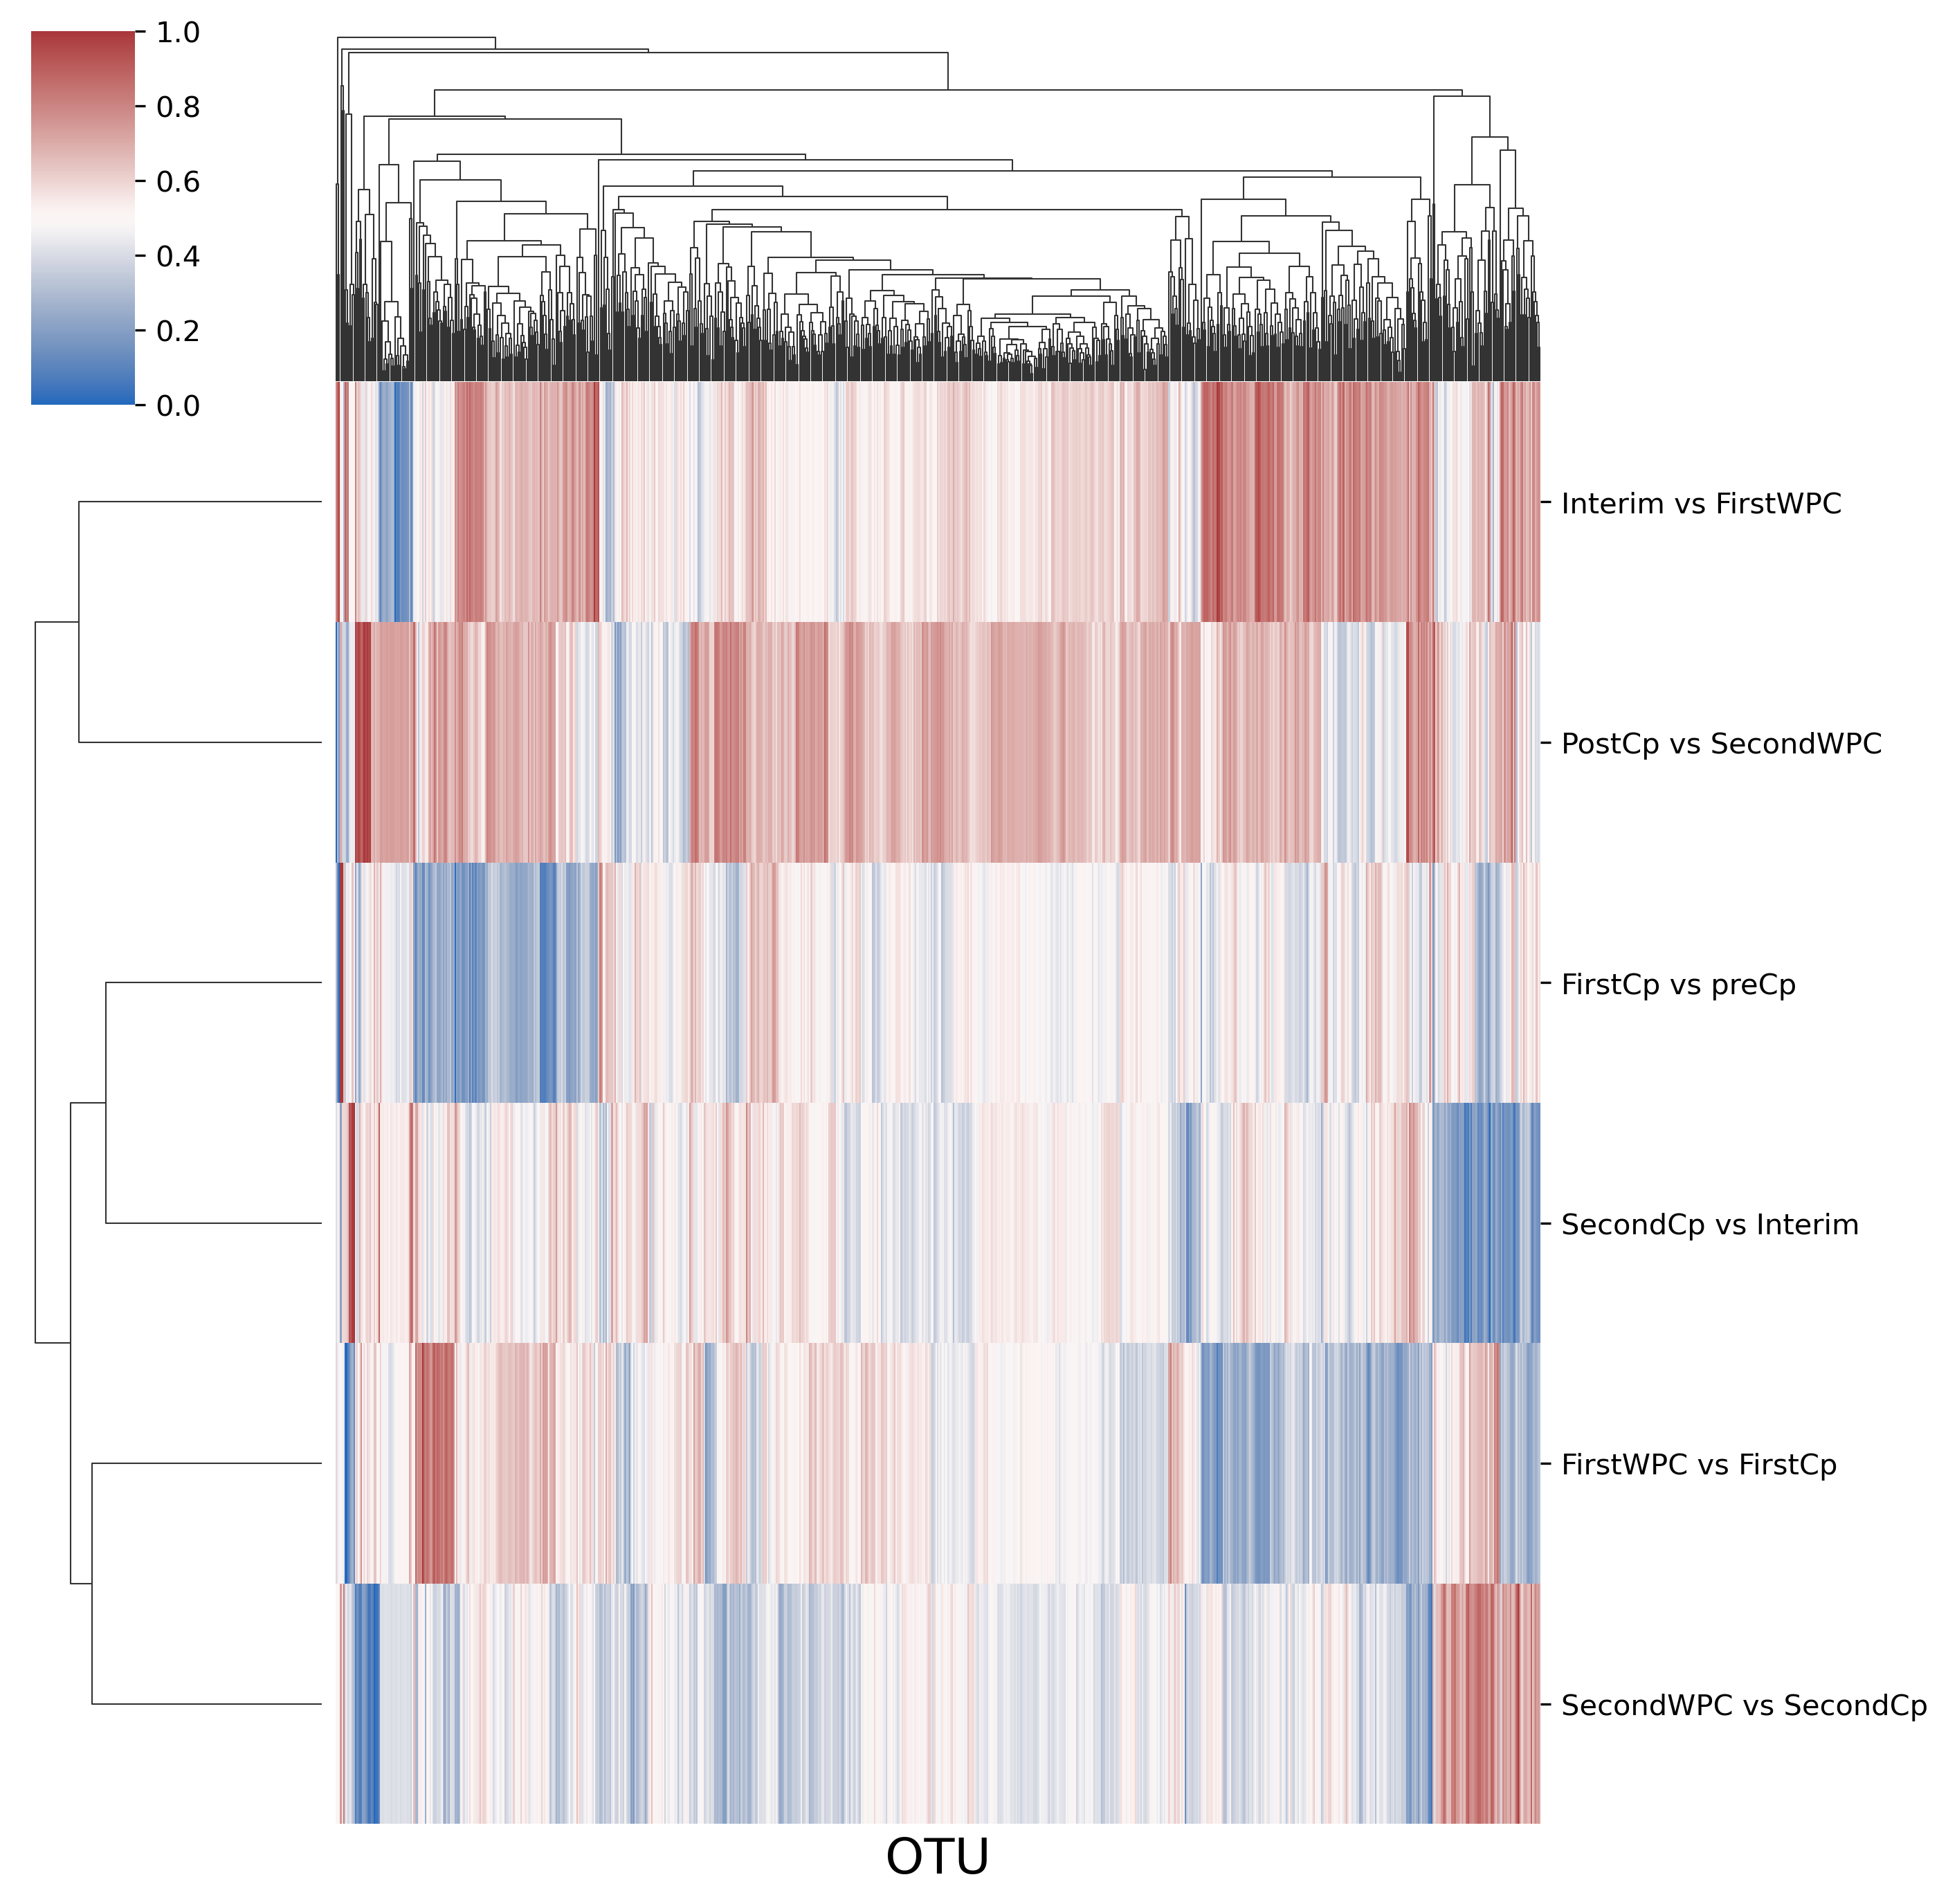

In [44]:
label_regex = re.compile("(\w+)_vs_(\w+)_mean")

g = sns.clustermap(
    summ_diff_cent.T,
    standard_scale=0,
    cmap="vlag",
    center=0.5,
)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel("OTU", fontsize="xx-large")
g.ax_heatmap.set_yticklabels(
    [" vs ".join(label_regex.search(x.get_text()).groups())
     for x in g.ax_heatmap.get_yticklabels()]
)

plt.show()

In [45]:
_df = summ_diff_cent.join(gg97_tax, how="inner")
# https://stackoverflow.com/a/32801170
genus_df = (
    _df
    .groupby("g")[summ_diff_cent.columns]
    .size()
    .to_frame(name="counts")
    .join(_df.groupby("g").median())
    .query("counts >= 10")
    .sort_values(by="counts")
    .drop(index=["g__"])
)
genus_df.head()

counts  FirstCp_vs_preCp_mean  FirstWPC_vs_FirstCp_mean  \
g                                                                              
g__[Ruminococcus]        11               0.509251                  0.708679   
g__Roseburia             12               0.316652                  1.062495   
g__Faecalibacterium      20               0.484600                  0.959745   
g__Coprococcus           28               0.803570                  0.257167   
g__Blautia               33               0.475822                  0.701878   

                     Interim_vs_FirstWPC_mean  SecondCp_vs_Interim_mean  \
g                                                                         
g__[Ruminococcus]                   -0.651059                  0.981611   
g__Roseburia                        -0.566975                  0.185132   
g__Faecalibacterium                 -0.455929                 -0.383483   
g__Coprococcus                      -0.709461                  0.928054   
g__Blautia                          -0.761568                  0.915875   

                     SecondWPC_vs_SecondCp_mean  PostCp_vs_SecondWPC_mean  
g                                                                          
g__[Ruminococcus]                     -0.713938                  1.069445  
g__Roseburia                           0.056585                  0.929536  
g__Faecalibacterium                    0.536628                 -0.626997  
g__Coprococcus                        -1.268523                  1.110034  
g__Blautia                            -1.089374                  1.682258

In [46]:
genus_df.reset_index().drop(columns=["counts"]).melt(id_vars=["g"]).head()

g               variable     value
0    g__[Ruminococcus]  FirstCp_vs_preCp_mean  0.509251
1         g__Roseburia  FirstCp_vs_preCp_mean  0.316652
2  g__Faecalibacterium  FirstCp_vs_preCp_mean  0.484600
3       g__Coprococcus  FirstCp_vs_preCp_mean  0.803570
4           g__Blautia  FirstCp_vs_preCp_mean  0.475822

In [47]:
main_melt_df = (
    summ_diff_cent
    .filter(like="_mean")
    .join(gg97_tax)
    .drop(columns=list("kpcofs"))
    .melt(id_vars=["g"])
    .assign(subject="overall")
)
main_melt_df.head()

g               variable     value  subject
0  g__Ruminococcus  FirstCp_vs_preCp_mean -3.411482  overall
1   g__Coprococcus  FirstCp_vs_preCp_mean  1.333190  overall
2              g__  FirstCp_vs_preCp_mean -1.317381  overall
3     g__Dialister  FirstCp_vs_preCp_mean -2.100655  overall
4    g__Sutterella  FirstCp_vs_preCp_mean -0.171500  overall

In [48]:
timepoint_genus_df = (
    main_melt_df.query("g != 'g__'")
    .groupby(["variable", "g"])
    .agg(["mean"])
    .droplevel(0, axis=1)
    .reset_index()
    .assign(count=lambda x: x["g"].map(gg97_tax_counts))
    .query("count >= 3")
    .rename(columns={"variable": "timepoint"})
    .assign(timepoint=lambda x: x["timepoint"].str.replace("_mean", ""))
    .assign(g=lambda x: x["g"].str.replace("g__", ""))
)
timepoint_genus_df.head()

timepoint             g      mean  count
1   FirstCp_vs_preCp   Actinomyces  2.008308      3
3   FirstCp_vs_preCp   Akkermansia  1.001099      7
5   FirstCp_vs_preCp  Anaerostipes -0.618574      5
7   FirstCp_vs_preCp   Bacteroides -0.581477     79
10  FirstCp_vs_preCp       Blautia  0.309907     33

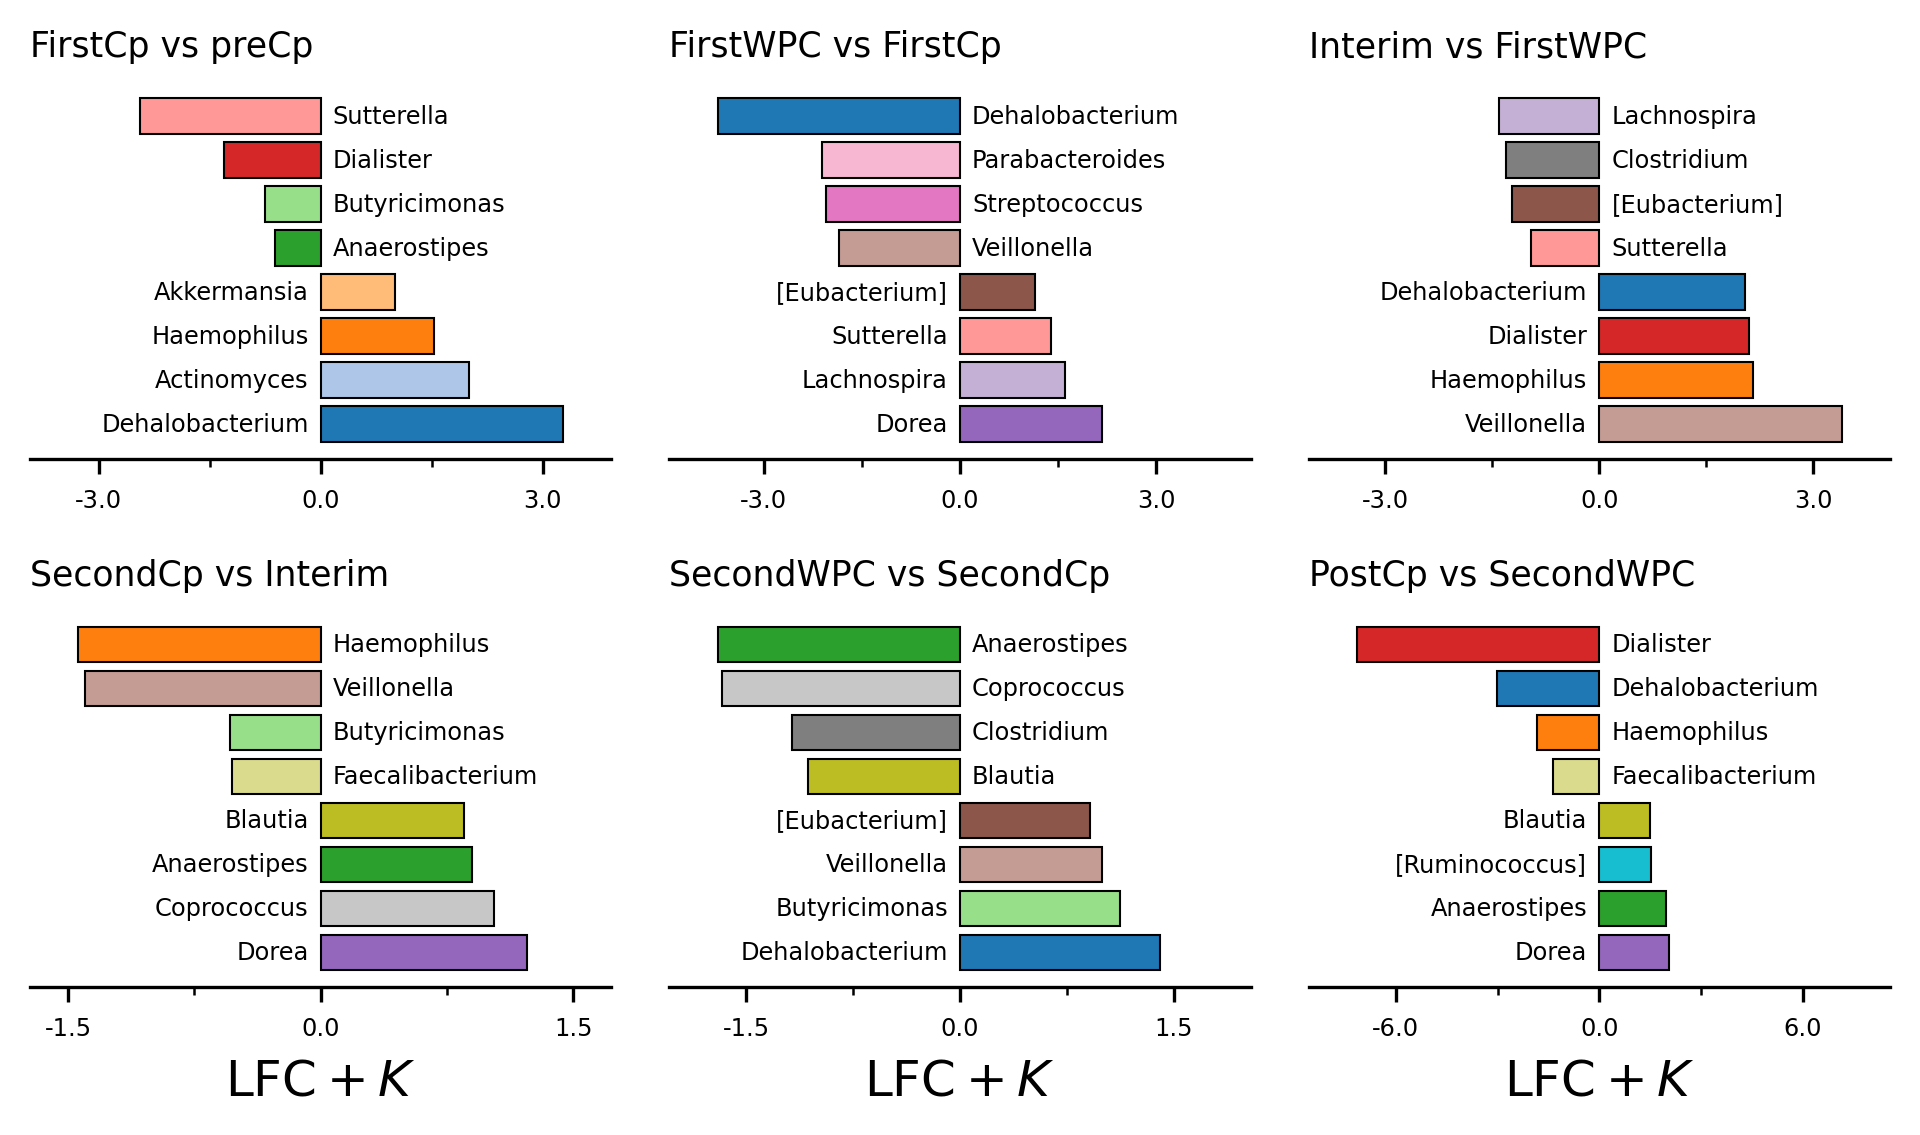

In [49]:
fig, axs = plt.subplots(2, 3, figsize=(8, 4))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

n = 4

tab20 = sns.color_palette("tab20").as_hex()
counter = 0
pal = dict()

x = np.arange(n*2)
for i, (ax, diff) in enumerate(zip(axs.flatten(), levels_diffs)):
    idx = list(range(n)) + list(range(-n, 0))
    
    _timepoint_df = (
        timepoint_genus_df
        .query("timepoint == @diff")
        .sort_values(by="mean", ascending=False)
        .iloc[idx]
    )
    genera = _timepoint_df["g"].values   
    for genus in genera:
        # Add color to palette if it hasn't been seen before
        if genus not in pal:
            pal[genus] = tab20[counter]
            counter += 1

    ax.barh(
        x,
        _timepoint_df["mean"],
        color=_timepoint_df["g"].map(pal),
        edgecolor="black",
        lw=0.5
    )
    
    max_val = _timepoint_df["mean"].abs().max()
    offset = 0.2
    ax.set_xlim([-max_val-offset*max_val, max_val+offset*max_val])
    
    for j in range(n*2):
        row = _timepoint_df.iloc[j]
        
        if row["mean"] < 0:
            _x = 0 + max_val*0.05
            ha = "left"
        else:
            _x = 0 - max_val*0.05
            ha = "right"
            
        ax.text(
            x=_x,
            y=j,
            s=row["g"],
            ha=ha,
            va="center",
            fontsize="xx-small"
        )
                 
    ax.yaxis.set_visible(False)
    ax.set_title(diff.replace("_", " "), fontsize="small")
    ax.tick_params("x", labelsize="xx-small")
    ax.xaxis.set_major_locator(mticker.MaxNLocator(3))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter("%.1f"))
    ax.spines["left"].set_visible(False)
    
    if i >= 3:
        ax.set_xlabel(r"$\mathrm{LFC} + K$")

plt.savefig("../figures/relman_abx/top_bot_4_contrast.pdf")
plt.show()

In [50]:
subj_melt_df = (
    subj_df_renamed
    .filter(like="_vs_")
    .filter(like="_mean")
    .join(gg97_tax)
    .drop(columns=list("kpcofs"))
    .melt(id_vars=["g"])
    .assign(subject=lambda x: x["variable"].str.extract("(494\.[DEF])"))
    .assign(variable=lambda x: x["variable"].str.extract("494\.[DEF]_(.*)"))
)
subj_melt_df = subj_melt_df[subj_melt_df["g"].isin(genus_df.index)]
subj_melt_df.head()

g               variable     value subject
0  g__Ruminococcus  FirstCp_vs_preCp_mean -0.856453   494.D
1   g__Coprococcus  FirstCp_vs_preCp_mean  3.524711   494.D
5       g__Blautia  FirstCp_vs_preCp_mean -0.106460   494.D
7   g__Coprococcus  FirstCp_vs_preCp_mean -1.185012   494.D
9   g__Bacteroides  FirstCp_vs_preCp_mean  1.428996   494.D

In [51]:
all_df = pd.concat([main_melt_df, subj_melt_df]).reset_index(drop=True)
all_df.head()

g               variable     value  subject
0  g__Ruminococcus  FirstCp_vs_preCp_mean -3.411482  overall
1   g__Coprococcus  FirstCp_vs_preCp_mean  1.333190  overall
2              g__  FirstCp_vs_preCp_mean -1.317381  overall
3     g__Dialister  FirstCp_vs_preCp_mean -2.100655  overall
4    g__Sutterella  FirstCp_vs_preCp_mean -0.171500  overall

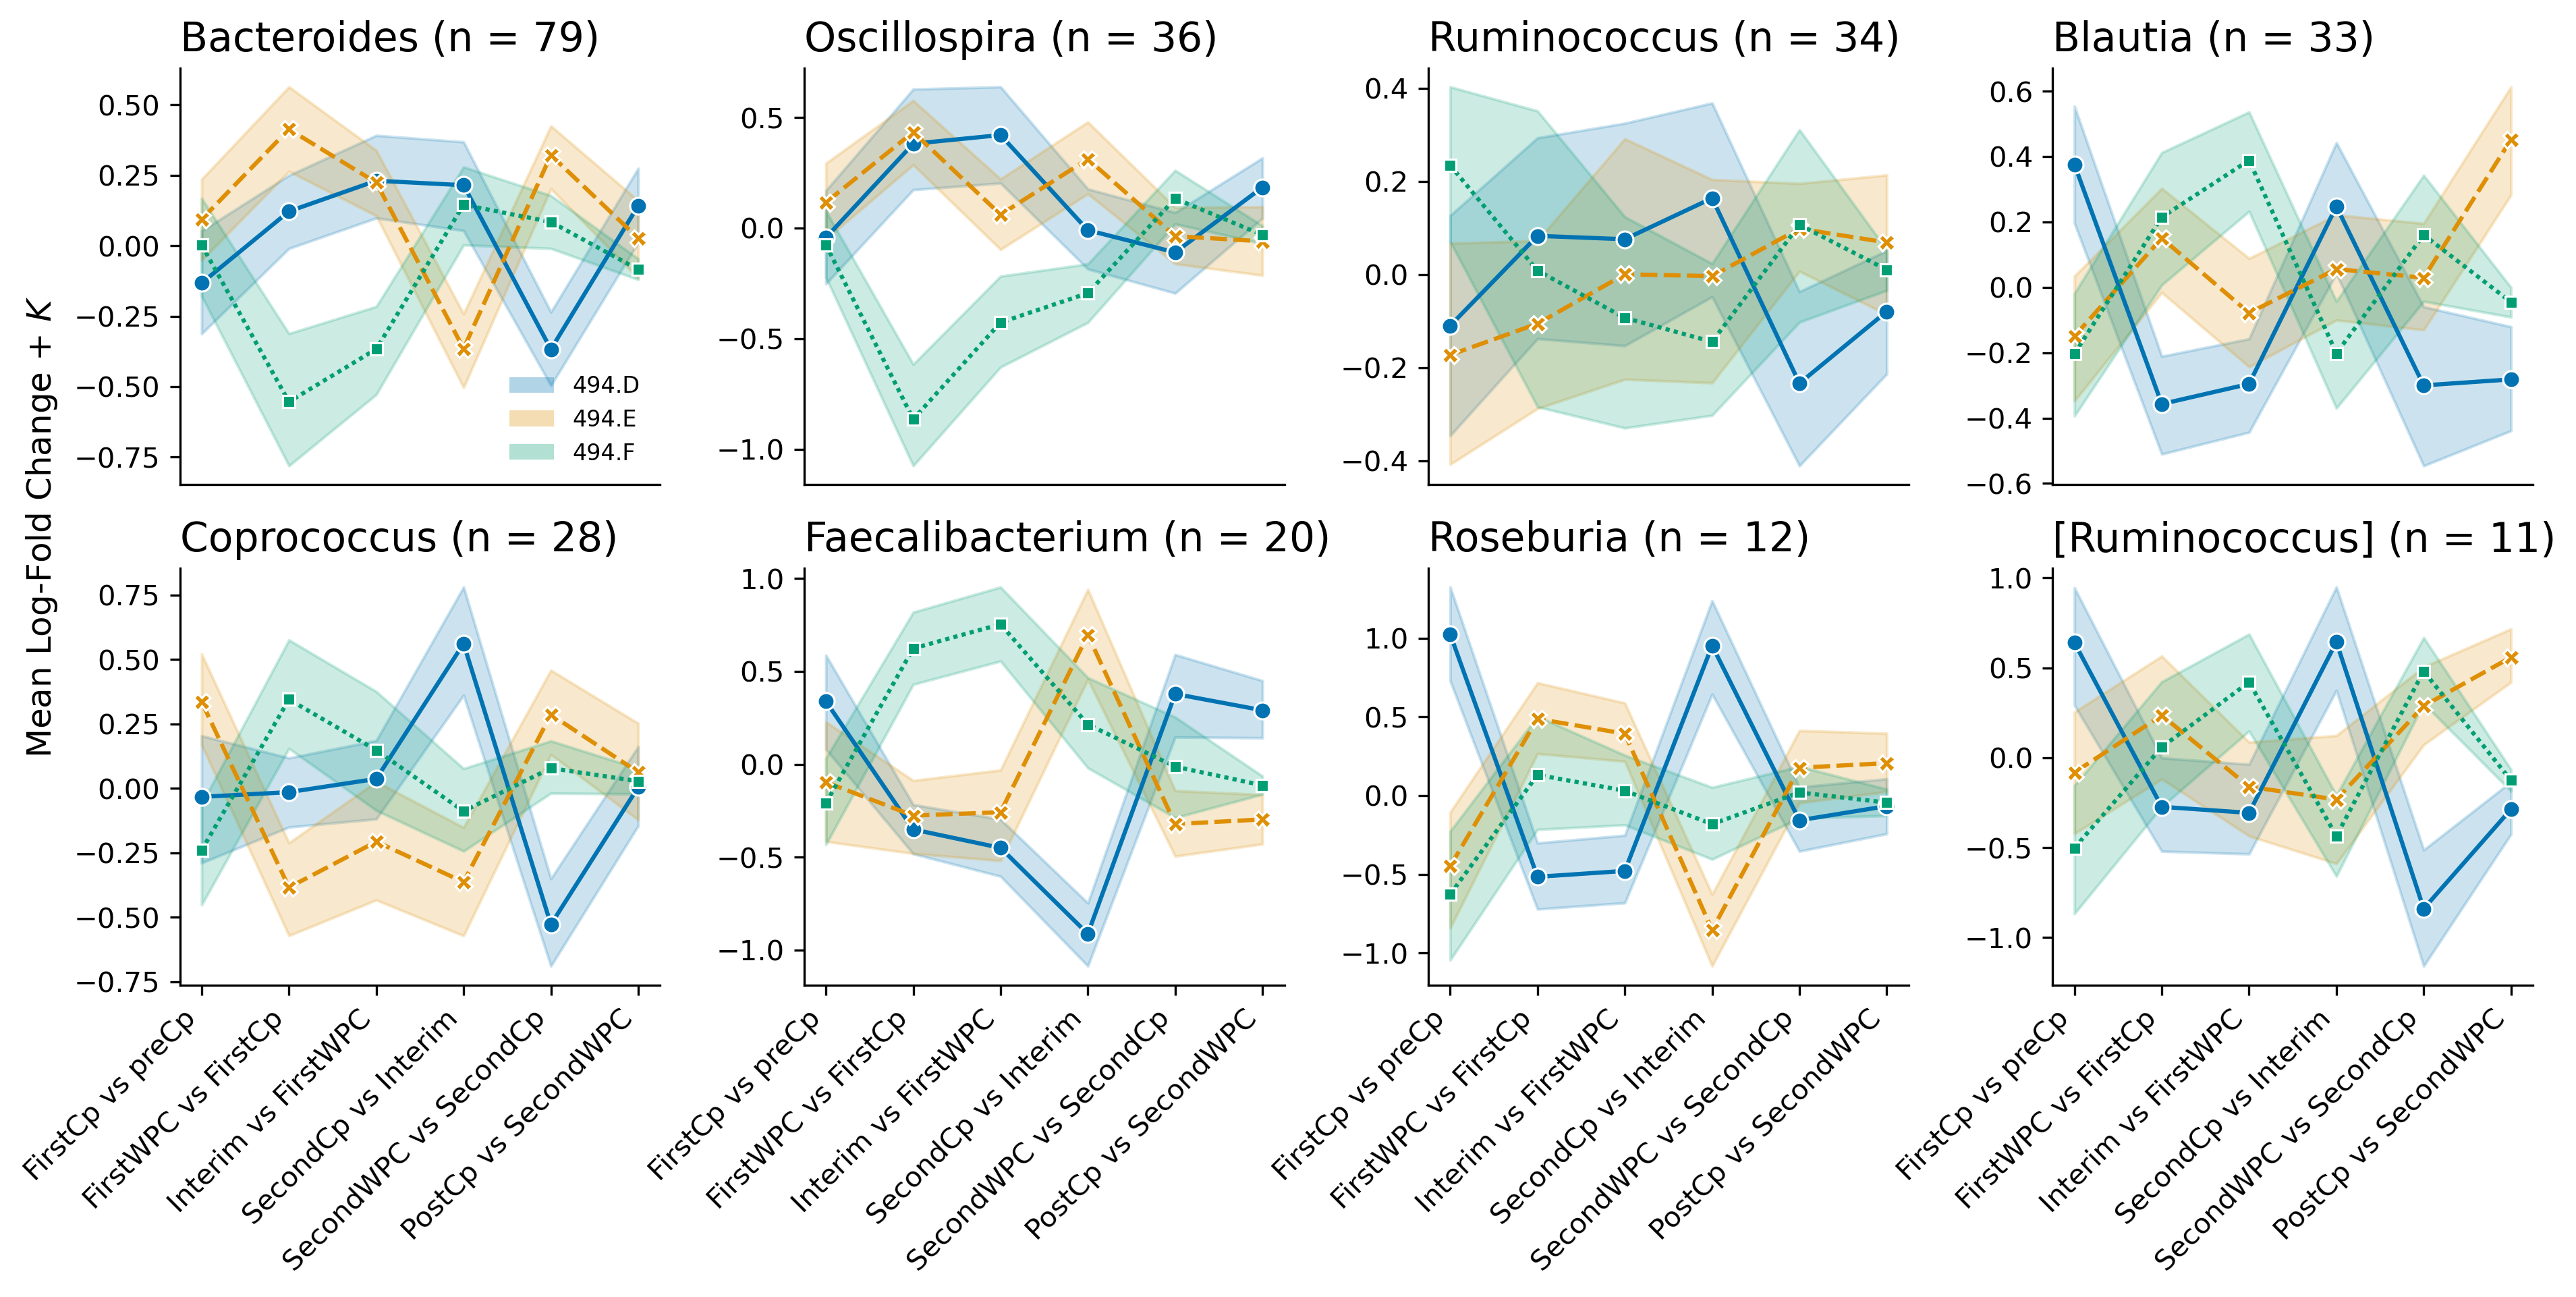

In [52]:
pal = subj_palette.copy()
pal["overall"] = "black"

fig, axs = plt.subplots(2, 4, figsize=(15, 6), sharex=True)
plt.subplots_adjust(wspace=0.3)

for i, (genus, ax) in enumerate(zip(top_genera, axs.flatten())):
    _df = subj_melt_df.query("g == @genus").copy()

    sns.lineplot(
        data=_df,
        x="variable",
        y="value",
        hue="subject",
        style="subject",
        markers=True,
        ci=68,
        palette=pal,
        legend=False,
        ax=ax
    )
    
    ax.set_xticks(np.arange(len(levels_diffs)))
    if i > 3:
        ax.set_xticklabels(map(lambda x: x.replace("_", " "), levels_diffs), rotation=45, ha="right")
    else:
        ax.tick_params("x", width=0)

    counts = genus_df.loc[genus, "counts"]
    ax.set_title(f"{genus.replace('g__', '')} (n = {counts})")
    ax.set_ylabel("")
    ax.set_xlabel("")
    
big_ax = fig.add_subplot(111, frameon=False)
big_ax.tick_params("both", labelcolor="none", bottom=False, left=False)
big_ax.set_ylabel(r"Mean Log-Fold Change + $K$", labelpad=20)

subj_patches = [
    Patch(facecolor=color, label=label, linewidth=0.5, edgecolor=None, alpha=0.3)
    for label, color in subj_palette.items()
]

axs[0, 0].legend(
    handles=subj_patches,
    loc="lower right",
    fontsize=8,
    frameon=False
)

plt.show()

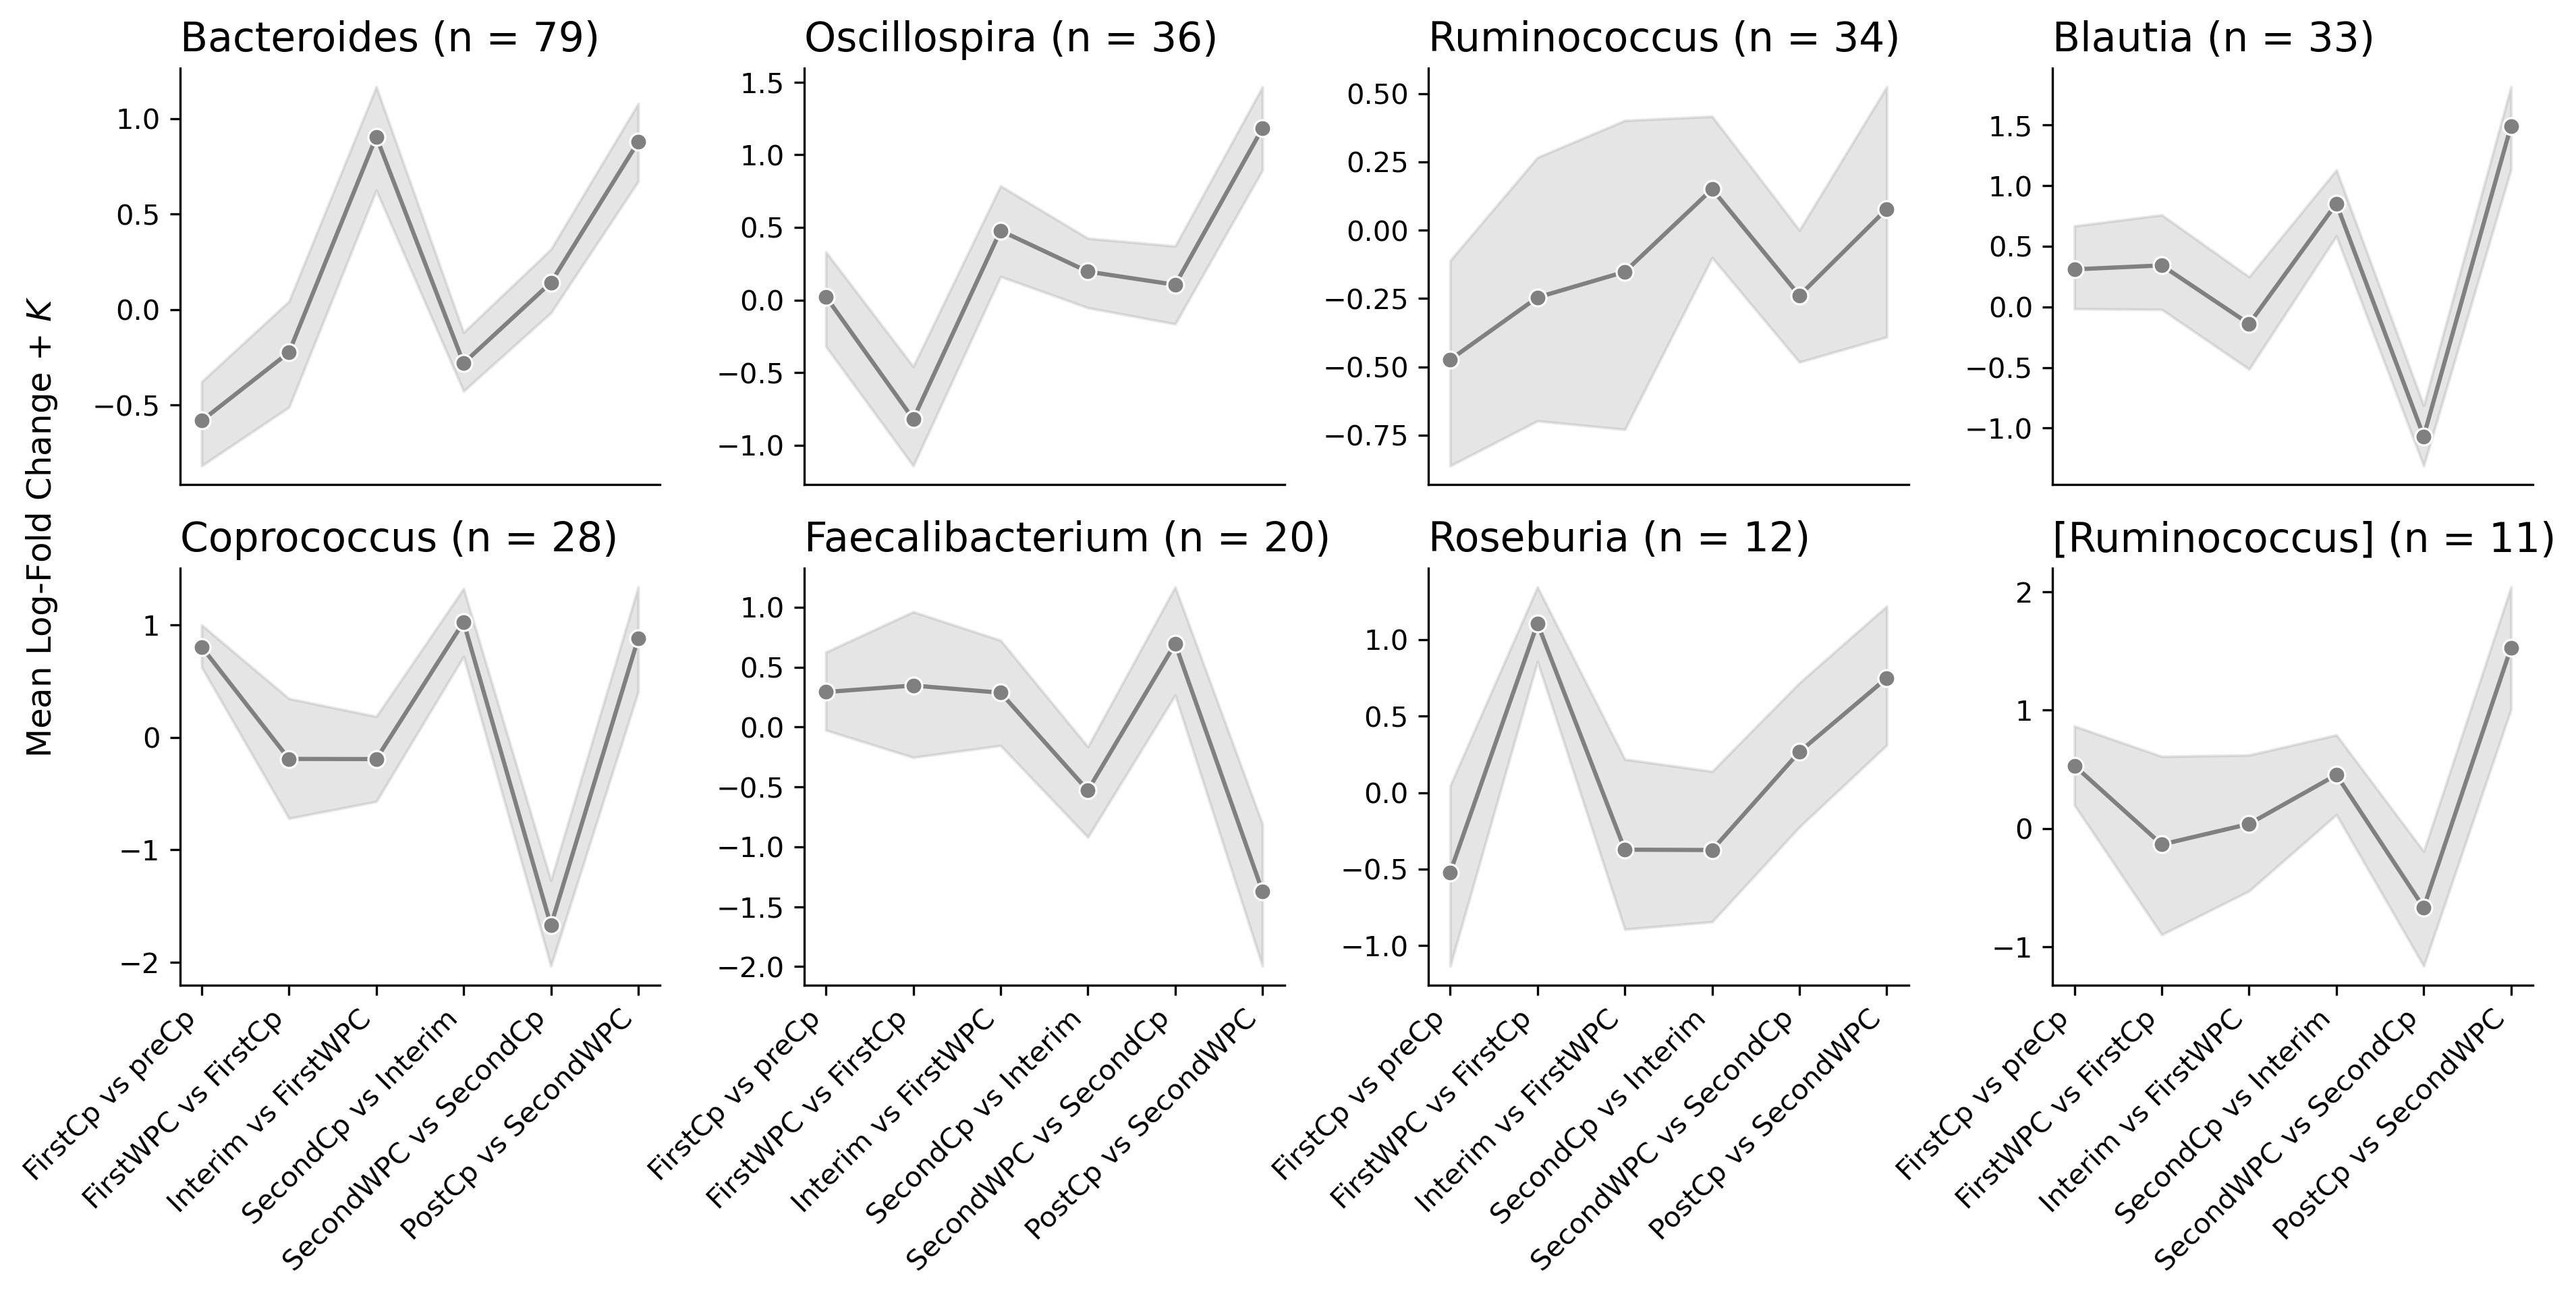

In [53]:
pal = subj_palette.copy()
pal["overall"] = "black"

fig, axs = plt.subplots(2, 4, figsize=(15, 6), sharex=True)
plt.subplots_adjust(wspace=0.3)

for i, (genus, ax) in enumerate(zip(top_genera, axs.flatten())):
    _df = main_melt_df.query("g == @genus and subject == 'overall'")

    sns.lineplot(
        data=_df,
        x="variable",
        y="value",
        markers=True,
        color="gray",
        style="subject",
        ci=68,
        legend=False,
        ax=ax
    )
    
    ax.set_xticks(np.arange(len(levels_diffs)))
    if i > 3:
        ax.set_xticklabels(map(lambda x: x.replace("_", " "), levels_diffs), rotation=45, ha="right")
    else:
        ax.tick_params("x", width=0)

    counts = genus_df.loc[genus, "counts"]
    ax.set_title(f"{genus.replace('g__', '')} (n = {counts})")
    ax.set_ylabel("")
    ax.set_xlabel("")
    
big_ax = fig.add_subplot(111, frameon=False)
big_ax.tick_params("both", labelcolor="none", bottom=False, left=False)
big_ax.set_ylabel(r"Mean Log-Fold Change + $K$", labelpad=20)

plt.show()

In [54]:
subj_melt_all_df = (
    subj_df_renamed
    .filter(like="mean")
    .filter(like="vs")
    .reset_index()
    .melt(id_vars=["Feature"])
    .assign(subject=lambda x: x["variable"].str.extract("(494\.[DEF])"))
    .assign(timepoint=lambda x: x["variable"].str.extract("494\.[DEF]_(.*)_mean"))
    .assign(timepoint=lambda x: x["timepoint"].str.replace("_", " "))
    .drop(columns=["variable"])
)
subj_melt_all_df.head()

Feature     value subject         timepoint
0   F174654 -0.856453   494.D  FirstCp vs preCp
1   F833381  3.524711   494.D  FirstCp vs preCp
2  F4398588  1.554824   494.D  FirstCp vs preCp
3  F4457453  1.822649   494.D  FirstCp vs preCp
4   F215097  1.869470   494.D  FirstCp vs preCp

[56.49015608 43.18740612  0.3224378 ]
[63.83248863 35.71566731  0.45184406]
[55.16638247 44.33714352  0.49647402]
[54.81489833 44.83250802  0.35259365]
[58.58344107 40.98940703  0.4271519 ]
[64.14266326 34.74057477  1.11676196]


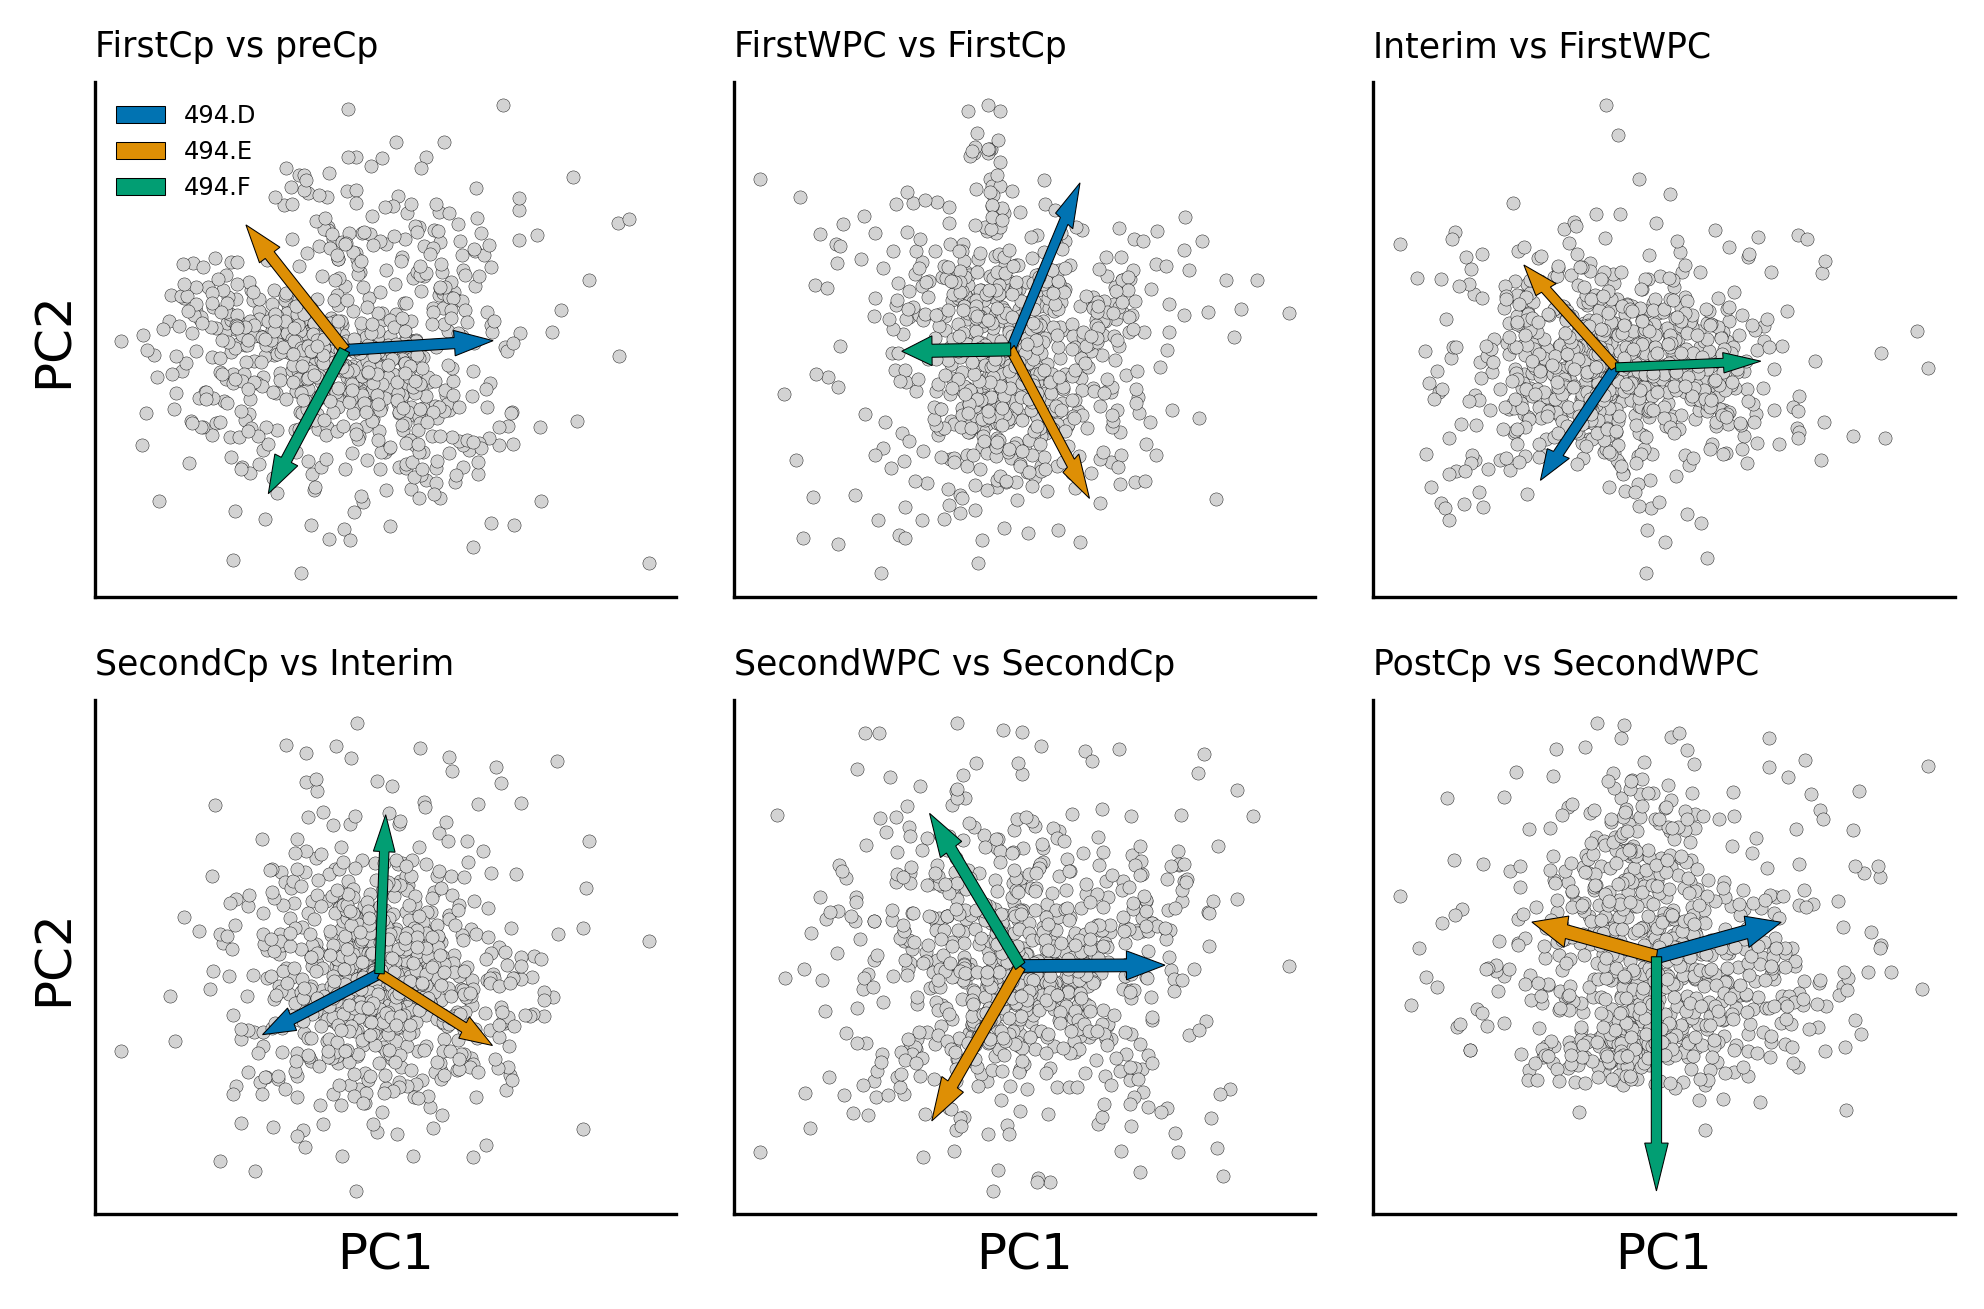

In [55]:
def plot_timepoint_pca(timepoint, ax):
    _df = (
        subj_melt_all_df
        .query("timepoint == @timepoint")
        .pivot(index="Feature", columns="subject", values="value")
    )
    X = StandardScaler().fit_transform(_df)
    subj_ranks_pca = PCA(n_components=3)
    Y = subj_ranks_pca.fit_transform(X)
    subj_feature_pcs_df = pd.DataFrame(Y, index=subj_df_renamed.index)
    subj_feature_pcs_df.head()

    subj_diff_pcs_df = pd.DataFrame(subj_ranks_pca.components_.T, index=_df.columns)
    subj_diff_pcs_df
    
    sns.scatterplot(
        data=subj_feature_pcs_df,
        x=0,
        y=1,
        ax=ax,
        color="lightgray",
        edgecolor="black",
        s=10,
        linewidth=0.1,
    )

    scale = 3
    subj_diff_regex = re.compile("^(494.[DEF])")
    for diff, row in subj_diff_pcs_df.iterrows():
        arrow_coords = (row[0]*scale, row[1]*scale)
        ax.arrow(
            x=0, y=0,
            dx=arrow_coords[0], dy=arrow_coords[1],
            head_width=0.4,
            length_includes_head=True,
            width=0.175,
            linewidth=0.25,
            edgecolor="black",
            facecolor=subj_palette.get(diff),
            label=subj_diff_regex.search(diff).groups()[0]
        )
    print(subj_ranks_pca.explained_variance_ratio_ * 100)


fig, axs = plt.subplots(2, 3, figsize=(8, 5))
plt.subplots_adjust(wspace=0.1)

ax_time = enumerate(zip(axs.flatten(), subj_melt_all_df["timepoint"].unique()))
for i, (ax, timepoint) in ax_time:
    plot_timepoint_pca(timepoint, ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(timepoint, fontsize="small")
    if i < 3:
        ax.set_xlabel("")
    else:
        ax.set_xlabel("PC1")
        
    if i in [0, 3]:
        ax.set_ylabel("PC2")
    else:
        ax.set_ylabel("")
    
axs[0, 0].legend(
    frameon=False,
    fontsize="xx-small"
)

plt.savefig("../figures/relman_abx/subj_contrast_pca.pdf")
plt.show()

In [56]:
birdman_rank_melt = (
    summ_diff_cent
    .filter(like="mean")
    .rename(columns=lambda x: x.replace("_mean", ""))
    .rank(pct=True, ascending=False)
    .join(gg97_tax[["g"]])
    .reset_index()
    .melt(id_vars=["Feature", "g"])
    .assign(Tool="birdman")
)

deseq2_rank_melt = (
    deseq2_df
    .rank(pct=True, ascending=False)
    .join(gg97_tax[["g"]])
    .reset_index()
    .melt(id_vars=["Feature", "g"])
    .assign(Tool="deseq2")
)

comp_rank_melt = pd.concat([birdman_rank_melt, deseq2_rank_melt])
comp_rank_melt.head()

Feature                g          variable     value     Tool
0   F174654  g__Ruminococcus  FirstCp_vs_preCp  0.934307  birdman
1   F833381   g__Coprococcus  FirstCp_vs_preCp  0.222628  birdman
2  F4398588              g__  FirstCp_vs_preCp  0.793187  birdman
3  F4457453     g__Dialister  FirstCp_vs_preCp  0.851582  birdman
4   F215097    g__Sutterella  FirstCp_vs_preCp  0.624088  birdman

In [57]:
# lower value -> more associated

def get_rank_diffs(df):
    x = df.query("Tool == 'birdman'")["value"].item()
    y = df.query("Tool == 'deseq2'")["value"].item()
    return x - y

rank_diffs = (
    comp_rank_melt
    .query("variable == 'SecondCp_vs_Interim'")
    .groupby("Feature")
    .apply(get_rank_diffs)
    .sort_values()
    .to_frame(name="birdman_deseq2_pct_diff")
)
rank_diffs.head()

birdman_deseq2_pct_diff
Feature                          
F4474255                -0.534063
F4479989                -0.467153
F269386                 -0.450122
F4443094                -0.447689
F759816                 -0.442822

In [ ]:
all_rank_diffs = (
    comp_rank_melt
    .groupby(["variable", "Feature"])
    .apply(get_rank_diffs)
    .reset_index()
    .assign(g=lambda x: x["Feature"].map(genus_map))
    .rename(columns={0: "birdman_deseq2_pct_diff"})
)
all_rank_diffs.head()

In [ ]:
(
    all_rank_diffs
    .assign(birdman_deseq2_pct_diff=lambda x: x["birdman_deseq2_pct_diff"].abs())
    .query("g != 'g__'")
    .groupby(["variable", "g"])
    .mean()
    .sort_values(by="birdman_deseq2_pct_diff")
    .tail(20)
)

In [ ]:
def plot_rank_changes(genus, agg=True):
    feats = list(gg97_tax.query("g == @genus").index)
    
    _birdman_ranks = (
        summ_diff_cent
        .filter(like="mean")
        .rank(ascending=False)
        .rename(columns=lambda x: x.replace("_mean", ""))
        .loc[feats]
        .reset_index()
        .melt(id_vars=["Feature"])
        .assign(Tool="birdman")
    )
    
    _deseq2_ranks = (
        deseq2_df
        .rank(ascending=False)
        .loc[feats]
        .reset_index()
        .melt(id_vars=["Feature"])
        .assign(Tool="deseq2")
    )
    
    _comp_ranks = pd.concat([_birdman_ranks, _deseq2_ranks])
    _comp_ranks["variable"] = _comp_ranks["variable"].str.replace("_", " ")
    _comp_ranks["Tool"] = _comp_ranks["Tool"].map(tool_text_styling_dict)
    
    g = sns.catplot(data=_comp_ranks, col="variable", x="Tool", y="value",
                    col_wrap=3, kind="point", aspect=0.9, order=["DESeq2", "BIRDMAn"],
                    height=3, legend=False, hue=None if agg else "Feature")
    
    n = summ_diff_cent.shape[0]
    g.refline(y=n/2, zorder=0, color="black")
    g.set_titles("{col_name}")
    g.set(ylim=(-30, n+30))
    g.set_xlabels("")
    g.set_ylabels("Rank")
    
    for ax in g.axes:
        ax.tick_params("x", width=0)
        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
        ax.grid(axis="y", which="both")
    plt.suptitle(genus.replace("g__", ""), y=1.04, fontsize="xx-large")

In [ ]:
plot_rank_changes("g__Sutterella", agg=False)

In [ ]:
plot_rank_changes("g__Desulfovibrio", agg=False)

In [ ]:
plot_rank_changes("g__Bilophila", agg=False)

In [ ]:
plot_rank_changes("g__SMB53", agg=False)